In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import requests
import math

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import roc_auc_score
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal, spearmanr
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("life_expectancy_data.csv")
dataframe.columns = dataframe.columns.str.strip()
dataframe.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness 10-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [3]:
dataframe = dataframe.replace(" ",np.nan)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Exploratory Data Analaysis

In [5]:
dataframe.describe(include="all").T

count unique          top  freq  \
Country                            2938    193  Afghanistan    16   
Year                             2938.0    NaN          NaN   NaN   
Status                             2938      2   Developing  2426   
Life expectancy                  2928.0    NaN          NaN   NaN   
Adult Mortality                  2928.0    NaN          NaN   NaN   
infant deaths                    2938.0    NaN          NaN   NaN   
Alcohol                          2744.0    NaN          NaN   NaN   
percentage expenditure           2938.0    NaN          NaN   NaN   
Hepatitis B                      2385.0    NaN          NaN   NaN   
Measles                          2938.0    NaN          NaN   NaN   
BMI                              2904.0    NaN          NaN   NaN   
under-five deaths                2938.0    NaN          NaN   NaN   
Polio                            2919.0    NaN          NaN   NaN   
Total expenditure                2712.0    NaN          NaN   NaN   
Diphtheria                       2919.0    NaN          NaN   NaN   
HIV/AIDS                         2938.0    NaN          NaN   NaN   
GDP                              2490.0    NaN          NaN   NaN   
Population                       2286.0    NaN          NaN   NaN   
thinness 10-19 years             2904.0    NaN          NaN   NaN   
thinness 5-9 years               2904.0    NaN          NaN   NaN   
Income composition of resources  2771.0    NaN          NaN   NaN   
Schooling                        2775.0    NaN          NaN   NaN   

                                            mean              std      min  \
Country                                      NaN              NaN      NaN   
Year                                  2007.51872         4.613841   2000.0   
Status                                       NaN              NaN      NaN   
Life expectancy                        69.224932         9.523867     36.3   
Adult Mortality                       164.796448       124.292079      1.0   
infant deaths                          30.303948       117.926501      0.0   
Alcohol                                 4.602861         4.052413     0.01   
percentage expenditure                738.251295      1987.914858      0.0   
Hepatitis B                            80.940461        25.070016      1.0   
Measles                               2419.59224     11467.272489      0.0   
BMI                                    38.321247        20.044034      1.0   
under-five deaths                      42.035739       160.445548      0.0   
Polio                                  82.550188        23.428046      3.0   
Total expenditure                        5.93819          2.49832     0.37   
Diphtheria                             82.324084        23.716912      2.0   
HIV/AIDS                                1.742103         5.077785      0.1   
GDP                                  7483.158469     14270.169342  1.68135   
Population                       12753375.120052  61012096.508428     34.0   
thinness 10-19 years                    4.839704         4.420195      0.1   
thinness 5-9 years                      4.870317         4.508882      0.1   
Income composition of resources         0.627551         0.210904      0.0   
Schooling                              11.992793          3.35892      0.0   

                                        25%          50%          75%  \
Country                                 NaN          NaN          NaN   
Year                                 2004.0       2008.0       2012.0   
Status                                  NaN          NaN          NaN   
Life expectancy                        63.1         72.1         75.7   
Adult Mortality                        74.0        144.0        228.0   
infant deaths                           0.0          3.0         22.0   
Alcohol                              0.8775        3.755       7.7025   
percentage expenditure             4.685343    64.912906   441.5341

In [6]:
dataframe[["Life expectancy"]].describe().T.join(
    pd.DataFrame({
    "median" : [dataframe["Life expectancy"].median()]
    },index=["Life expectancy"])
)

count       mean       std   min   25%   50%   75%   max  \
Life expectancy  2928.0  69.224932  9.523867  36.3  63.1  72.1  75.7  89.0   

                 median  
Life expectancy    72.1

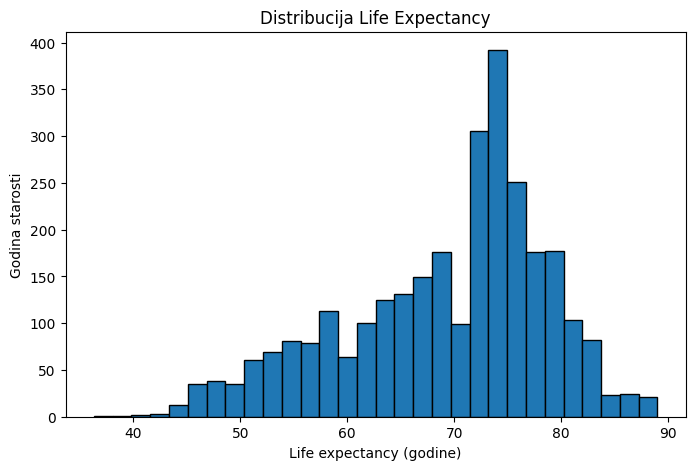

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe["Life expectancy"], bins=30,edgecolor="black",linewidth=1)
plt.xlabel("Life expectancy (godine)")
plt.ylabel("Godina starosti")
plt.title("Distribucija Life Expectancy")
plt.show()

In [8]:
pd.DataFrame({
    "missing_count": dataframe.isna().sum(),
    "missing_%": dataframe.isna().mean() * 100
}).query("missing_count > 0")

missing_count  missing_%
Life expectancy                             10   0.340368
Adult Mortality                             10   0.340368
Alcohol                                    194   6.603131
Hepatitis B                                553  18.822328
BMI                                         34   1.157250
Polio                                       19   0.646698
Total expenditure                          226   7.692308
Diphtheria                                  19   0.646698
GDP                                        448  15.248468
Population                                 652  22.191967
thinness 10-19 years                        34   1.157250
thinness 5-9 years                          34   1.157250
Income composition of resources            167   5.684139
Schooling                                  163   5.547992

Zbog ogromnog broja zemalja, vrsicemo observacije za 15 zemalja sa vrha dataseta

COUNTRY

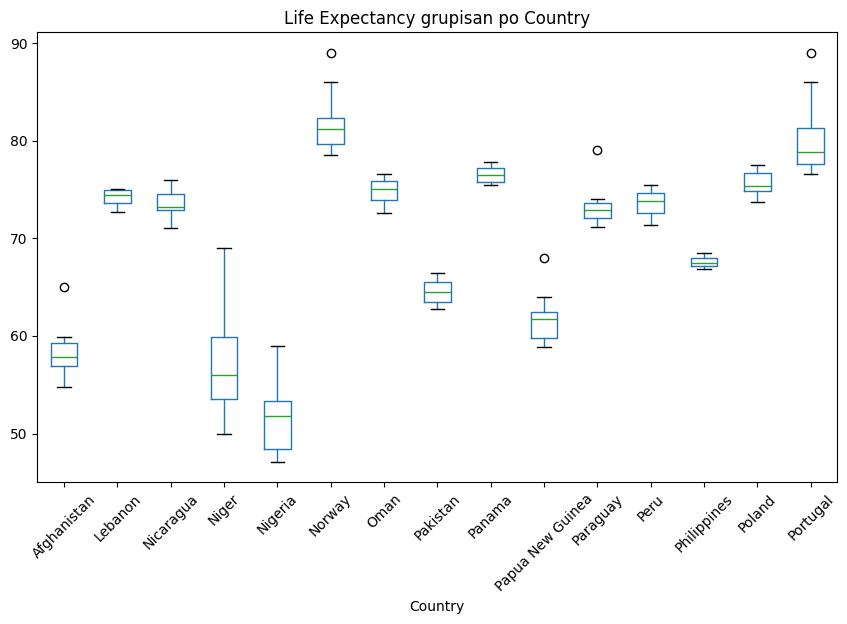

In [9]:
top_countries = dataframe["Country"].value_counts().head(15).index

dataframe[dataframe["Country"].isin(top_countries)].boxplot(
    column="Life expectancy",
    by="Country",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Country")
plt.suptitle("")
plt.grid(False)
plt.show()

YEAR

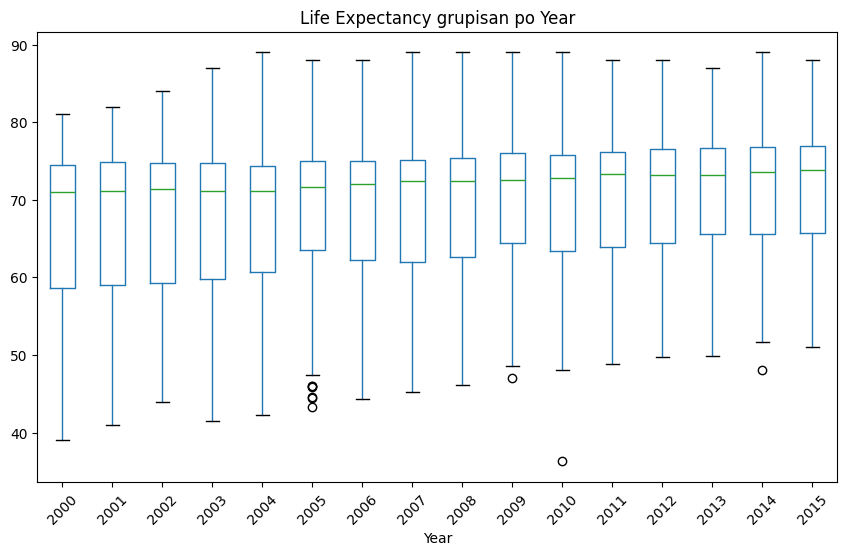

In [10]:
years = dataframe["Year"].value_counts().index

dataframe[dataframe["Year"].isin(years)].boxplot(
    column="Life expectancy",
    by="Year",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Year")
plt.suptitle("")
plt.grid(False)
plt.show()

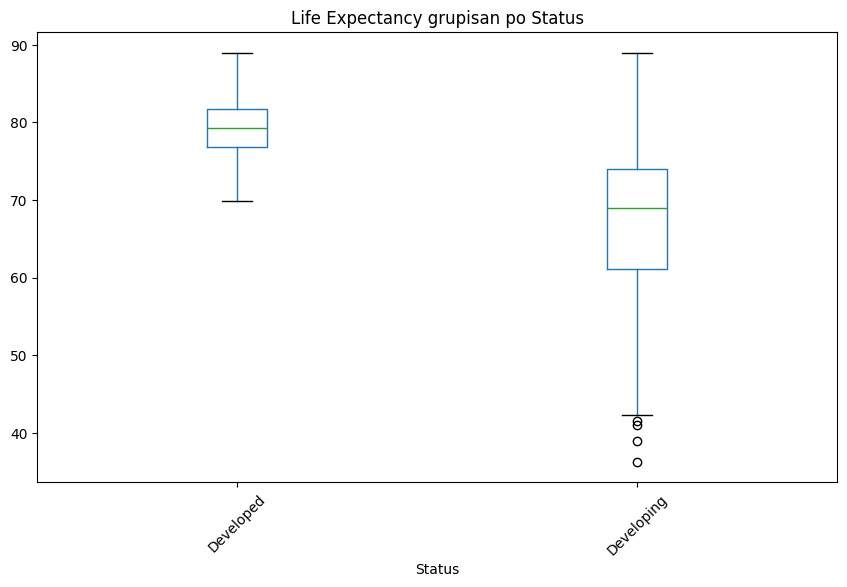

In [12]:
status = dataframe["Status"].value_counts().index

dataframe[dataframe["Status"].isin(status)].boxplot(
    column="Life expectancy",
    by="Status",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Status")
plt.suptitle("")
plt.grid(False)
plt.show()

ADULT MORTALITY

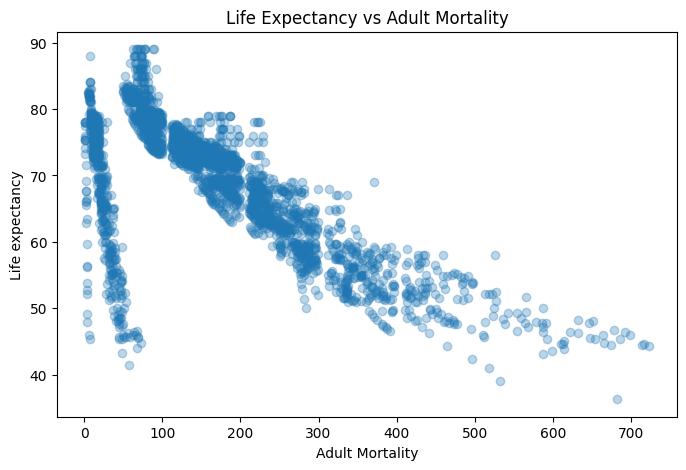

In [13]:
x = dataframe["Adult Mortality"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Adult Mortality")
plt.grid(False)
plt.show()

Odavde vidimo negativnu ali poprilicno jaku povezanost Adult Mortality-a i Life Expectancy-a (sto je Adult Mortality veci to je manji Life expectancy)
Uz to da nam outlier-i (donji desni podaci), ukazuju na trend koji je mozda izazvan epidemijom, ratovima itd.
Trend sa leve strane (prakticno vertikalni) nam oznacava ucestale vrednosti koje se ponavljaju u najcesce stabilnim zemljama (ocekujemo da dosta drzava ne varira previse u odnosu
Adult Mortality i Life Expectancy tokom vremena), ALI, vrlo je moguce i da neke od njih predstavljaju konkretene data error-e.
U zavinosti od toga da li je data error ili trend, mozemo kasnije zakljuciti racunom mean vrednosti te zemlje kroz godine itd.

INFANT DEATH

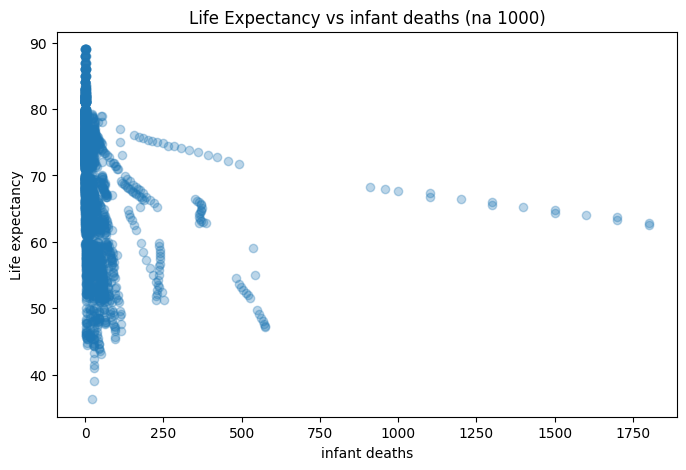

In [14]:
x = dataframe["infant deaths"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("infant deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs infant deaths (na 1000)")
plt.grid(False)
plt.show()

Promenljiva pokazuje apsolutan broj infant deaths x 1000, pa trend od preko 1000 infant deaths opisuje Indiju koja je imala veliki broj infant deaths kroz istoriju zbog zdravstvenih uslova,
trend izmedju 500 i 750 opisuje Kinu itd.
Levi stub oko kojeg vecina podataka pivotira ukazuje na manje drzave, sa manjim brojem infant deaths.
Sto idemo desnije od tog stuba, vidimo trendove za vece zemlje

ALCOHOL

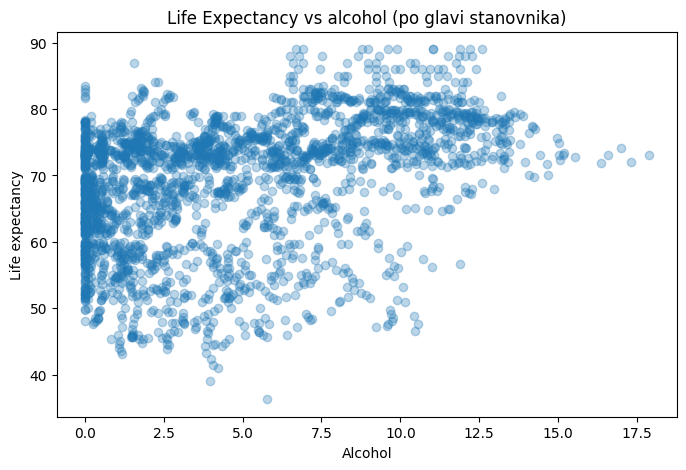

In [15]:
x = dataframe["Alcohol"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Alcohol")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs alcohol (po glavi stanovnika)")
plt.grid(False)
plt.show()

In [84]:
filtered_df_alcohol = (
    dataframe.loc[dataframe["Alcohol"] >= 15,
                  ["Country","Alcohol"]]
    .sort_values(by="Alcohol", ascending=False)
)
filtered_df_alcohol

Country  Alcohol
874     Estonia    17.87
228     Belarus    17.31
873     Estonia    16.99
875     Estonia    16.58
227     Belarus    16.35
876     Estonia    15.52
1523  Lithuania    15.19
1522  Lithuania    15.19
1525  Lithuania    15.14
877     Estonia    15.07
872     Estonia    15.04
1524  Lithuania    15.04

Gledajuci plot ne vidimo jaku povezanost alkohola i Life expectancy-a, videvsi i drzave koje su imali vise od 15 Litra po glavi stanovnika, ne deluju kao outlieri posto su ovo drzave istocne Evrope poznate po velikom konzumiranju alkohola.
Imamo i zemlje koje imaju veliku konzumaciju alkohola ali su pak razvijene, imaju dobru medicinu itd pa zbog toga zadrzavaju solidan life expectancy, sto nam ukazuje da je alkohol povezan
sa razvojem.

PERCENTAGE EXPENDITURE

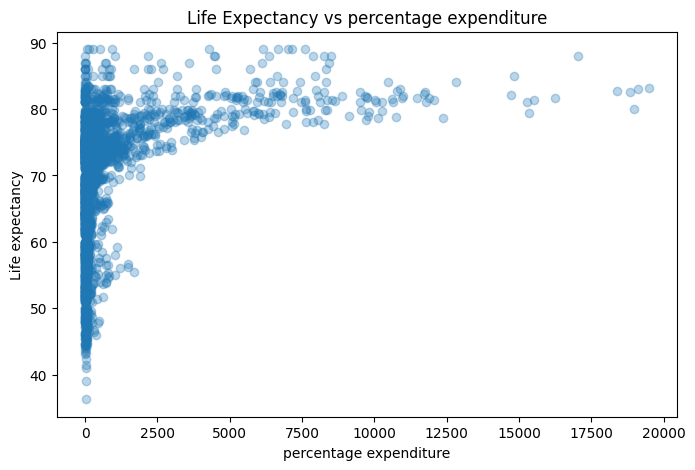

In [17]:
x = dataframe["percentage expenditure"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("percentage expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs percentage expenditure")
plt.grid(False)
plt.show()

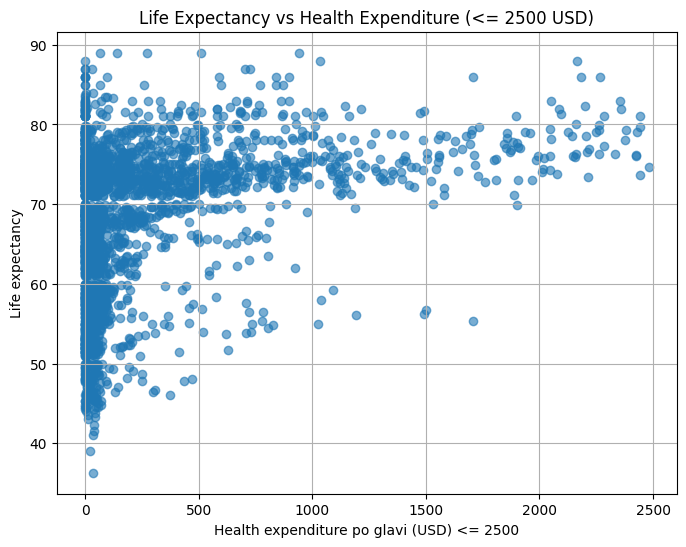

In [18]:
df_2500 = dataframe[dataframe["percentage expenditure"] <= 2500]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_2500["percentage expenditure"],
    df_2500["Life expectancy"],
    alpha=0.6
)

plt.xlabel("Health expenditure po glavi (USD) <= 2500")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Health Expenditure (<= 2500 USD)")
plt.grid(True)
plt.show()

Percentage expendtiure ovde predstavlja potrosnju na zdrasvto po glavi stanovnika, moguca multikolinearnost sa Total expenditure.
Jasno vidimo stub sa leve strane, koji ima raspodelu od minimuma do maksimuma za life expectancy, sto znaci da i drugi faktori jasno uticu na life expectancy ali ujedno da potrosnja do 2500 veoma jako utice na life expectancy, dok otp. preko 2500 dolazi do zasicenja, i ne vidimo rast u life expectancy-u.
Sa drugog plot-a vidimo jasan rast life expectancy-a za health expenditure (<=2500). 
Outlier-i nam ovde prerdstavlju life expectancy koji je (<50 ili >80) posto poprilicno nadmasuje prosecno life expectancy na globalnom nivou. Oni ne moraju nuzno biti uklonjeni posto mozda ukazuju na realne situacije (rat, epidemija... ili developed zemlje, dobar health care itd) 

(dosta ovakvih promenljivih mogu da se poboljasaju log transformacijama, ali otom potom)

Hepatitis B

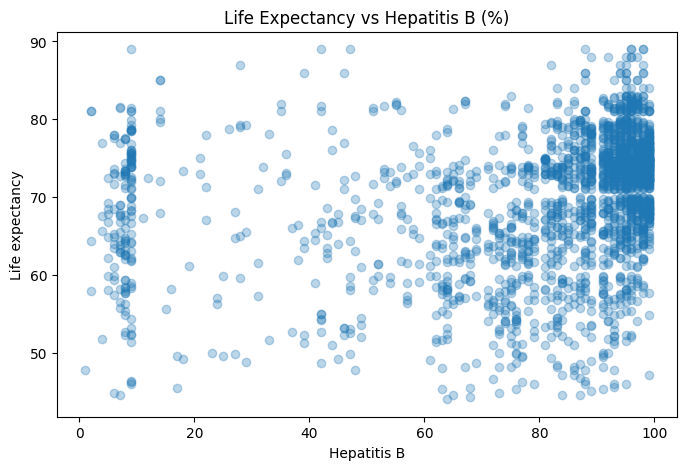

In [19]:
x = dataframe["Hepatitis B"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Hepatitis B")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Hepatitis B (%)")
plt.grid(False)
plt.show()

Ova promenljiva opisuje imunizaciju medju 1-godisnjom decom u %.
Postoji direktna povezanost sa life expectancy-om ali veza nije linerna (dosta tacaka sa visokom imunizacijom i life expectancyem), poprilicno je rasprsena, moze se upotrebiti za kategorijsku prom.
Takdoje imamo jasne high leverage point-ove. (0-15%,95-100%)
I imamo informativne outliere, gde odredjeni primeri imaju mali life expectancy iako imaju jak % imunizacije, sto ukazuje na uticaj drugih faktora.

MEASLES

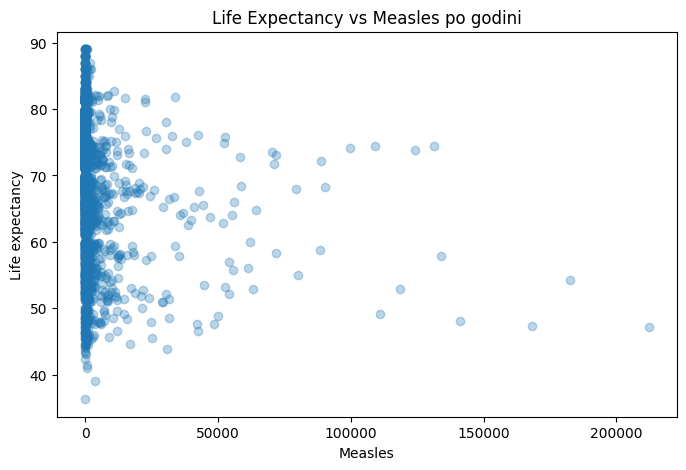

In [20]:
x = dataframe["Measles"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Measles")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Measles po godini")
plt.grid(False)
plt.show()

In [83]:
filtered_df_measles = (
    dataframe.loc[dataframe["Measles"] >= 100000,
                  ["Country","Measles"]]
    .sort_values(by="Measles", ascending=False)
)
filtered_df_measles

Country  Measles
567     China   131441
570     China   124219
1575   Malawi   118712
1903  Nigeria   110927
568     China   109023

Dosta podataka za Measles(Male boginje) pivotira oko 0, sto je normalan indikator posto vecina drzava nema prijavljen veliki broj Malih boginja, ali se ocigledno ne moze uociti direktna linearna veza izmedju slucajeva malih boginja i life expectancy-a.
Ekstremni slucajevi (>100 000) ukazuju na epidemije malih boginja, ovi high leverage podaci su opravdano veliki za te drzave i godine.

BMI

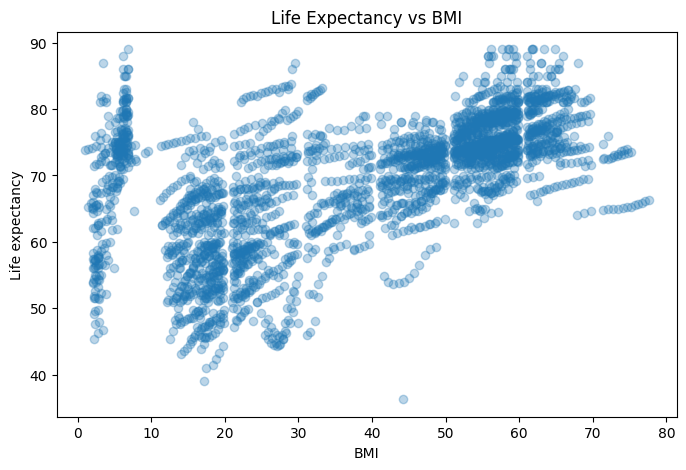

In [22]:
x = dataframe["BMI"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs BMI")
plt.grid(False)
plt.show()

Vidi se Jaka pozitivna veza izmedju BMI i Life expectancy-a ali nije linearna.
Veoma nizak BMI moze da nam ukazuje na drzave koje su siromasne i neuhranjene, ali mislim da dobar deo njih zapravo samo predstavlja data errore.
Ocigledni data errori za drzave su takodje i oni koji su >30, posto normalan chart BMI-a smatra Obese BMI koji je > 30. Sto na nivou drzave totalno nema smisla.
Najbolja odluka za ovaj feature bi bio dropping celog feature-a.

UNDER-FIVE-DEATHS

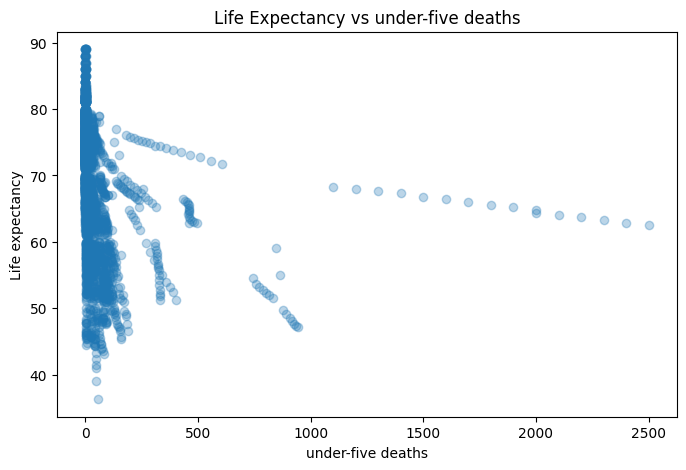

In [23]:
x = dataframe["under-five deaths"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("under-five deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs under-five deaths")
plt.grid(False)
plt.show()

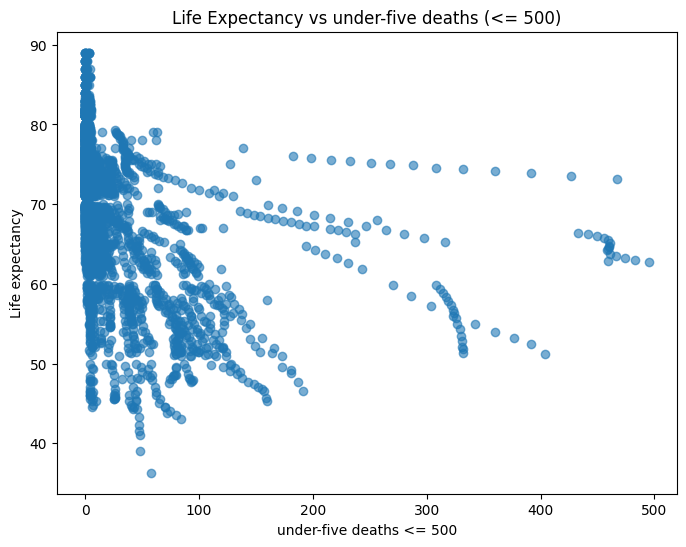

In [25]:
df_2500 = dataframe[dataframe["under-five deaths"] <= 500]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_2500["under-five deaths"],
    df_2500["Life expectancy"],
    alpha=0.6
)

plt.xlabel("under-five deaths <= 500")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs under-five deaths (<= 500)")
plt.grid(False)
plt.show()

Moze se videti relativno jaka negativna povezanost sa under-five deaths, ali i dalje ocigledno nedovoljno da sama opise life exepctancy kao i vecina drugih promenljivih do sad.
High leverage point-ovi trebaju biti istrazeni, ali obicno ukazuju na ogromne drzave. (Promenljiva opet predstavlja ukupni broj preminule dece, ne na 1000 stanovnika kao sto dataset opisuje)
Ponovo, 0 moze biti odlika nevalidnih vrednosti (najverovatnije), ali moze biti i inidkator razvijenih zemalja (sto je opet nerealno s obzirom da je globalni prosek 37)

POLIO

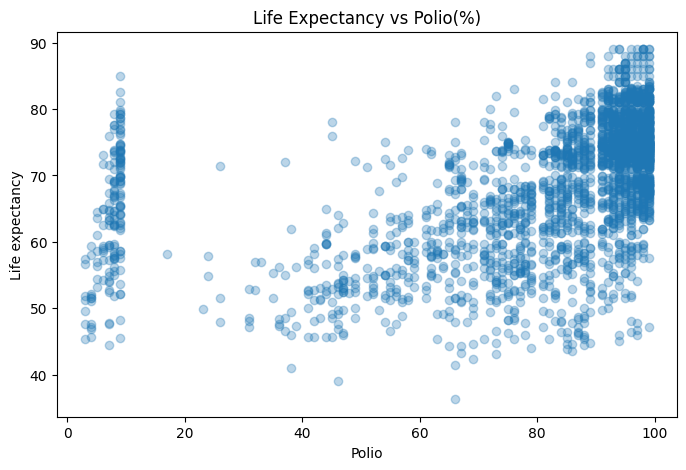

In [26]:
x = dataframe["Polio"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Polio")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Polio(%)")
plt.grid(False)
plt.show()

Promenljiva predstavlja procentualni broj vakcinisanih 1-godisnjaka, vidi se jaka povezanost, ali poprilicno monotona, svakako se vidi dobro grupisanje oko 10% i 95%, s toga je pogodna za 
transformaciju u kategorijsku promenljivu. Niske vrednosti su ili outlier-i ili jednostavno Polio nema toliki uticaj na life expectancy.

TOTAL EXPENDITURE

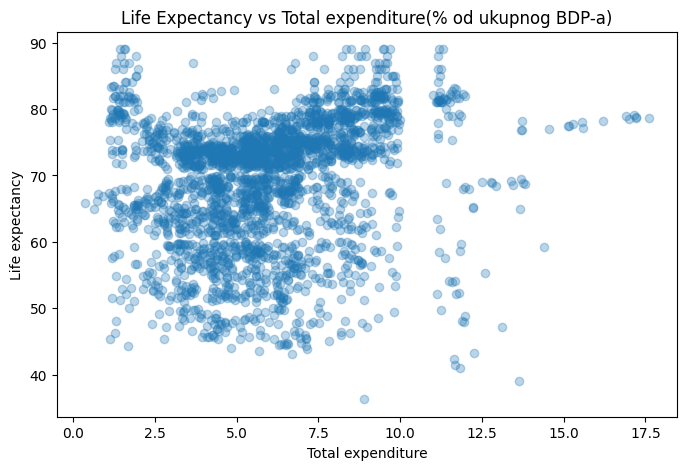

In [27]:
x = dataframe["Total expenditure"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Total expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Total expenditure(% od ukupnog BDP-a)")
plt.grid(False)
plt.show()

Total expenditure ima jako rasutu distribuciju, i sam po sebi je vrlo los feature, mozda ako ukljucimo neku multikolinearnost moze biti bolji (sa tipa adult mortality), ima prisutne i high leverage  pointove koji ne uticu na life expectancy.

DIPTHTHERIA

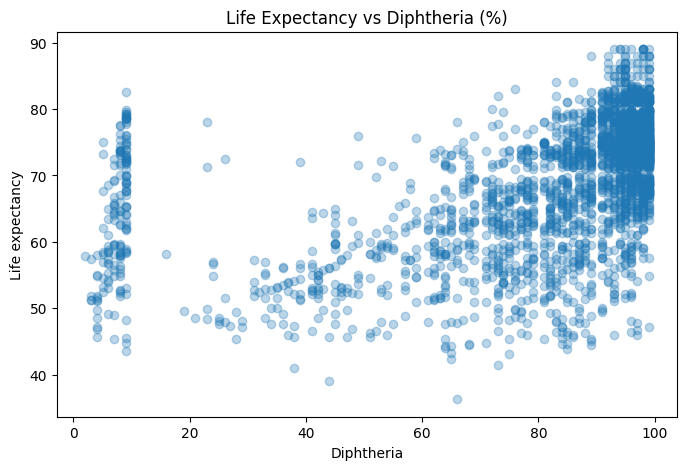

In [28]:
x = dataframe["Diphtheria"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Diphtheria")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Diphtheria (%)")
plt.grid(False)
plt.show()

Isto kao za Polio

HIV/AIDS

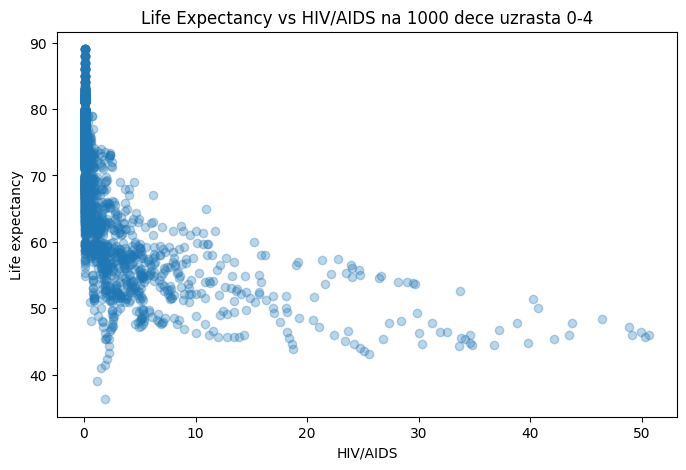

In [29]:
x = dataframe["HIV/AIDS"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("HIV/AIDS")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs HIV/AIDS na 1000 dece uzrasta 0-4")
plt.grid(False)
plt.show()

Vidimo relativno okej negativno povezani trend, ali da ponovo promenljiva, kao i vecina ostalih, ne moze sama po sebi lepo opisati life expectancy, ali posto je vecinom oko 0, moze imati lep uticaj na predikciju. 
Za visoke vrednosti vidimo drasticno nizi life expectancy sto je ocekivano (africke zemlje)

GDP

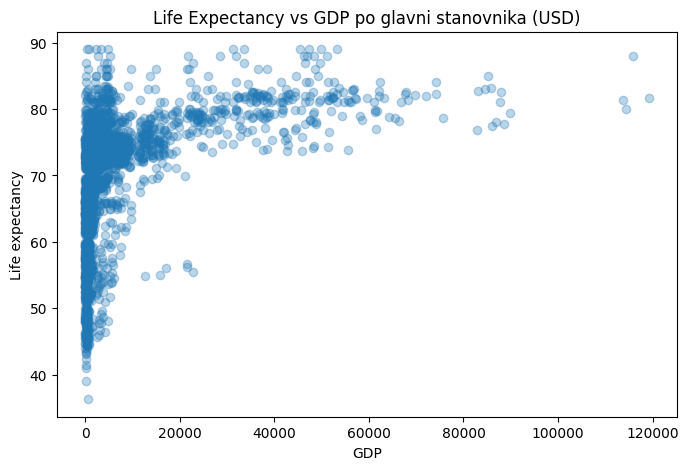

In [30]:
x = dataframe["GDP"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs GDP po glavni stanovnika (USD)")
plt.grid(False)
plt.show()

In [61]:
filtered_df_GDP = (
    dataframe.loc[dataframe["GDP"] >= 60000,
                  ["Country","GDP"]]
    .sort_values(by="GDP", ascending=False)
)
filtered_df_GDP

Country           GDP
1539  Luxembourg  119172.74180
1542  Luxembourg  115761.57700
1545  Luxembourg  114293.84330
1540  Luxembourg  113751.85000
1547  Luxembourg   89739.71170
1549  Luxembourg   75716.35180
114    Australia   67792.33860
115    Australia   67677.63477
1550  Luxembourg   65445.88530
116    Australia   62245.12900
113    Australia   62214.69120

Za GDP (po glavi stanovnika) mozemo jasno uociti pozitivnu povezanost, koja nije linearna, ali da ponovo ne mozemo na osnovu nje same po sebi zakljuciti jasan i jak efekat na life expectancy. Pritom, vidimo da drzave koje imaju velik GDP u proseku imaju veoma velik Life expectancy, ali da postoji neki marginalni efekat GDP-a (iznac 20000 se ne povecava znacajno Life expectancy).
Posmatranjem GDP-a koji je veci od 60 000, vidimo da ove tacke iako jesu influental points, ne predstavljaju netacne podatke, posto je GDP za Luxemburg stvarno i toliko visok.
U moru ovih niskih GDP-ova smo sigurni da postoje data errori u levom stubu, ali je prirodno da za vecinu zemalja bude < 10-15k .

POPULATION

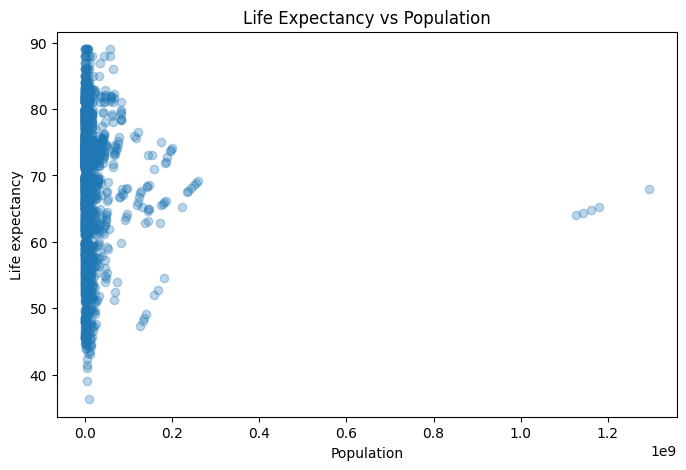

In [31]:
x = dataframe["Population"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Population")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Population")
plt.grid(False)
plt.show()

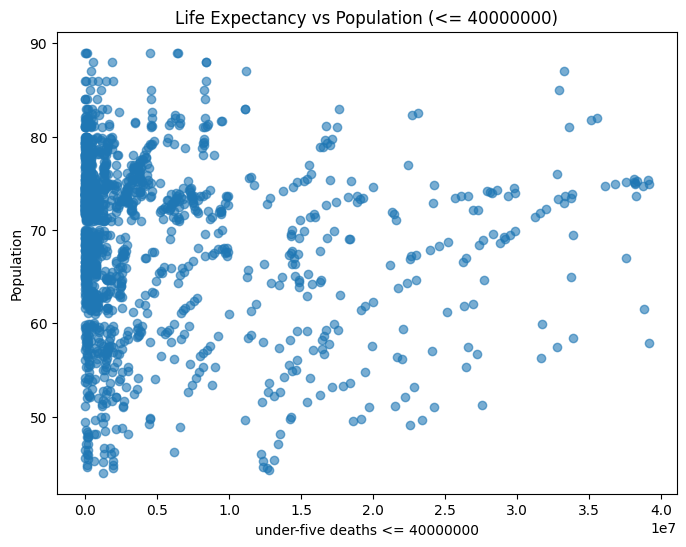

In [48]:
df_40000000 = dataframe[dataframe["Population"] <= 40000000]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_40000000["Population"],
    df_40000000["Life expectancy"],
    alpha=0.6
)

plt.xlabel("under-five deaths <= 40000000")
plt.ylabel("Population")
plt.title("Life Expectancy vs Population (<= 40000000)")
plt.grid(False)
plt.show()

In [ ]:
filtered_df_population = (
    dataframe.loc[dataframe["Population"] >= 1000000000, 
                  ["Country", "Population"]]
    .sort_values(by="Population", ascending=False)
)
filtered_df_population

Country    Population
1187   India  1.293859e+09
1194   India  1.179681e+09
1195   India  1.161978e+09
1196   India  1.144119e+09
1197   India  1.126136e+09

In [55]:
filtered_df_china = dataframe.loc[
    dataframe["Country"] == "China",
    ["Country", "Population"]
]
filtered_df_china

Country  Population
561   China    136427.0
562   China    135738.0
563   China    135695.0
564   China    134413.0
565   China    133775.0
566   China    133126.0
567   China   1324655.0
568   China   1317885.0
569   China     13112.0
570   China     13372.0
571   China    129675.0
572   China     12884.0
573   China      1284.0
574   China    127185.0
575   China   1262645.0

Population ocigledno nema linearne povezanosti sa Life expectancy. Podaci od preko 1 milijarde su ocekivani za drzavu poput Indije, ali i za drzavu poput Kine, sto je dodatna nelogicnost, ako posmatramo podatke za Kinu, vidimo da su ocigledno netacni.
Mimo toga, ne mozemo zakljuciti nikakvu korelisanost sa life expectancy.

THINNESS 1-19 YEARS koji je zapravo 10-19 years (greska u imenovanju kolone)

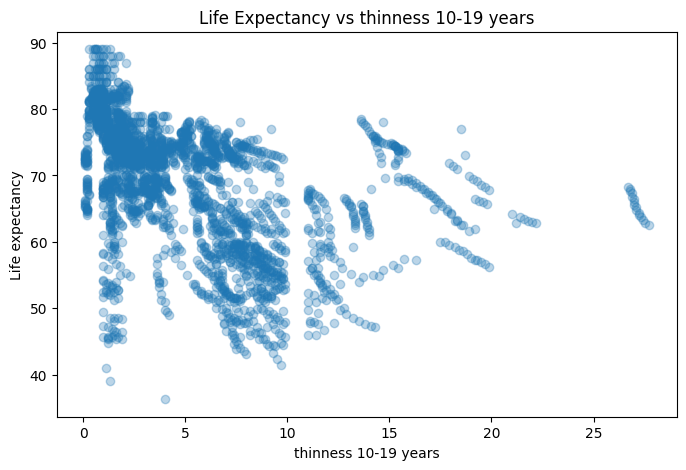

In [32]:
x = dataframe["thinness 10-19 years"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("thinness 10-19 years")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs thinness 10-19 years")
plt.grid(False)
plt.show()

Promenljiva opisuje "Ucestalost mrsavosti medju decom i adolescentima izmedju 10 i 19 godina u procentima" sto nam oznacava BMI koji je ispod ref. vrednosti, odnosno nedostatak nutritivnih vrednosti.
Moze se uociti slaba do umerena negativna linearna povezanost sa Life expectancty koja nije toliko izricita, sve klastere koji formiraju liniju mozemo videti kao entry-je za zasebne drzave, koje prate odredjeni trend neuhranjenosti.
Svakako je pristuno da je Life expectancy visok za vrednosti koje su blizu 0, ali vertikalni stub koji se javlja svuda naznacava uticaj drugih socio-ekonomskih faktora koji uticu na LE. Mozemo je posmatrati/kombinovati i sa drugim indikatorima (featurima)

THINNESS 5-9 YEARS

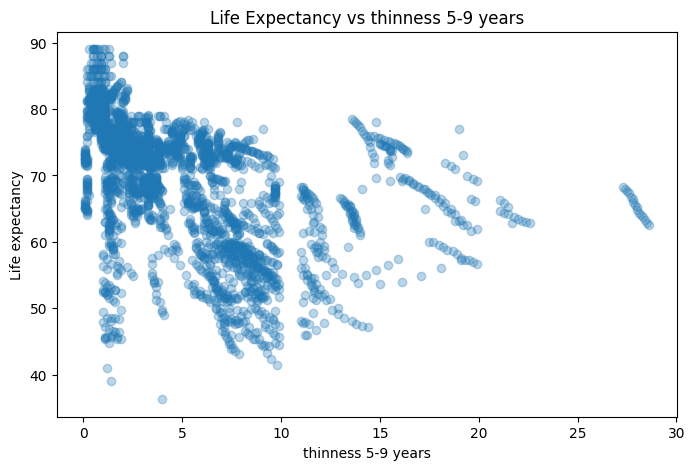

In [33]:
x = dataframe["thinness 5-9 years"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("thinness 5-9 years")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs thinness 5-9 years")
plt.grid(False)
plt.show()

Isti zakljucak kao za 10-19 thinness

INCOME COMPOSITION OF RESOURCES

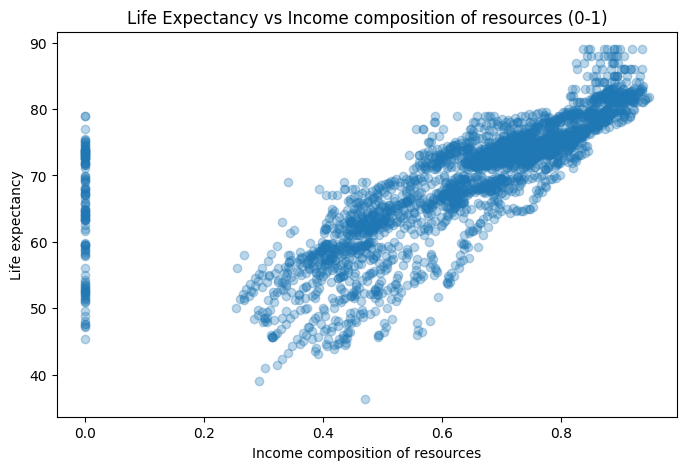

In [34]:
x = dataframe["Income composition of resources"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Income composition of resources (0-1)")
plt.grid(False)
plt.show()

In [63]:
df_filtered_icr = (
    dataframe.loc[dataframe["Income composition of resources"] < 0.1,
                  ["Country","Income composition of resources"]]
    .sort_values(by="Income composition of resources", ascending=False)
    
)
df_filtered_icr

Country  Income composition of resources
293                   Bhutan                              0.0
294                   Bhutan                              0.0
1468                 Lebanon                              0.0
1469                 Lebanon                              0.0
1470                 Lebanon                              0.0
1471                 Lebanon                              0.0
1472                 Lebanon                              0.0
1473                 Lebanon                              0.0
2296              Seychelles                              0.0
2702            Turkmenistan                              0.0
2703            Turkmenistan                              0.0
2704            Turkmenistan                              0.0
2705            Turkmenistan                              0.0
2706            Turkmenistan                              0.0
2707            Turkmenistan                              0.0
2708            Turkmenistan                              0.0
2709            Turkmenistan                              0.0
2710            Turkmenistan                              0.0
2852                 Vanuatu                              0.0
2853                 Vanuatu                              0.0
2854                 Vanuatu                              0.0
2855                 Vanuatu                              0.0
2856                 Vanuatu                              0.0
1393                Kiribati                              0.0
1392                Kiribati                              0.0
1391                Kiribati                              0.0
330   Bosnia and Herzegovina                              0.0
295                   Bhutan                              0.0
296                   Bhutan                              0.0
297                   Bhutan                              0.0
298                   Bhutan                              0.0
299                   Bhutan                              0.0
300                   Bhutan                              0.0
301                   Bhutan                              0.0
302                   Bhutan                              0.0
303                   Bhutan                              0.0
331   Bosnia and Herzegovina                              0.0
1390                Kiribati                              0.0
603                  Comoros                              0.0
604                  Comoros                              0.0
860                  Eritrea                              0.0
861                  Eritrea                              0.0
862                  Eritrea                              0.0
863                  Eritrea                              0.0
993                  Georgia                              0.0
1388                Kiribati                              0.0
1389                Kiribati                              0.0
2857                 Vanuatu                              0.0

Promenljiva opisuje razvoj zasnovan na prihodima po stanovniku, koji je normalizovan izmedju 0 i 1.
Za data entry-e gde je ova vrednost = 0.0, treba proveriti da li je to uopste moguce, teoretski deluje moguce, ali te drzave bi morale biti poptpune dikatature gde ne postoji veci economic income za stanovnika po godini, komunizam ili sta vec, sto je realno verovatno nemoguce, pa su ovi data entry-ji most probably opet, data errori (laka ti zemlja ema).
Mimo toga, vidimo jasnu i jaku pozitivnu povezanost ove promenljive sa Life expectancty-jem, gde high leverage pointovi dostizu cak i ~ 90 godina.
Siguran kandidat za feature selection.
U poredjenju sa GDP-om, ovaj indeks nam daje jasniji indikator.

SCHOOLING

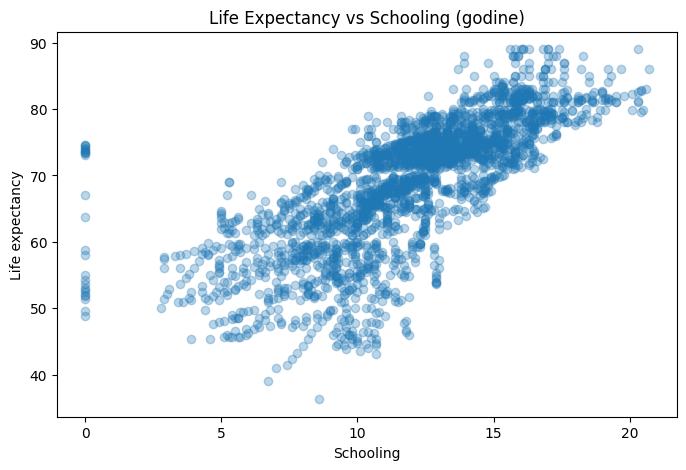

In [35]:
x = dataframe["Schooling"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Schooling (godine)")
plt.grid(False)
plt.show()

Na istu notu kao Income composition of resources. Mislim da je Schooling 0 na nivou drzave, sigurno nemoguc.

DATA CLEANING

In [10]:
dataframe.duplicated().any()

False

In [11]:
(dataframe.isnull().sum()/dataframe.shape[0]*100).round(2)

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
BMI                                 1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness 10-19 years                1.16
thinness 5-9 years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

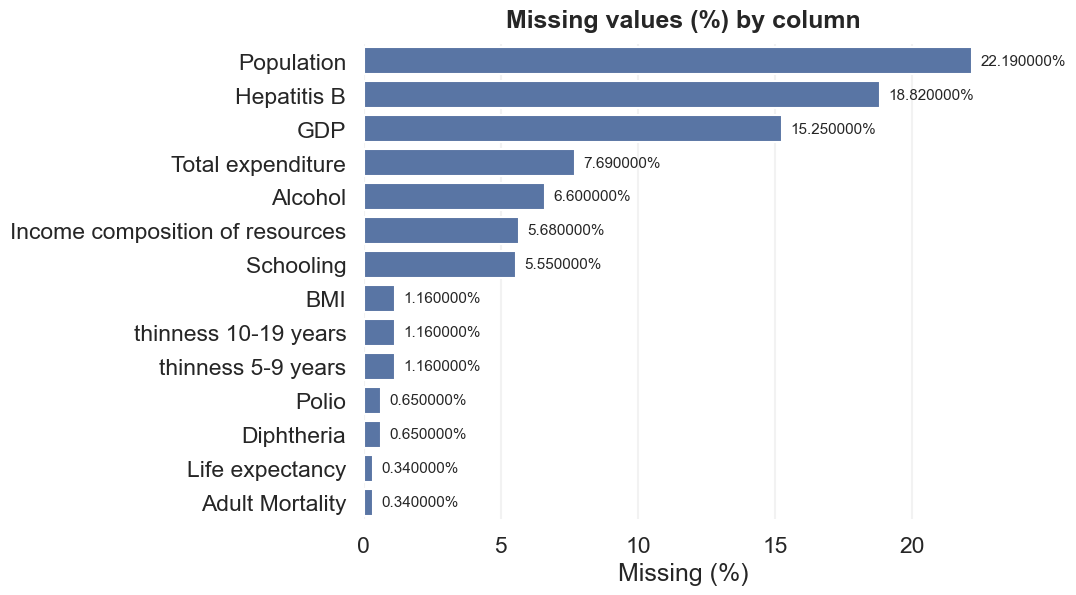

In [12]:
miss_pct = (dataframe.isnull().mean() * 100).round(2)
miss_pct = miss_pct[miss_pct > 0].sort_values(ascending=False)

plot_df = miss_pct.reset_index()
plot_df.columns = ["column", "missing_%"]

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(11, max(4.5, 0.45 * len(plot_df))))
ax = sns.barplot(data=plot_df, x="missing_%", y="column", errorbar=None)

ax.set_title("Missing values (%) by column", pad=12, weight="bold")
ax.set_xlabel("Missing (%)")
ax.set_ylabel("")

ax.grid(True, axis="x", alpha=0.25)
ax.grid(False, axis="y")
sns.despine(left=True, bottom=True)

for container in ax.containers:
    ax.bar_label(container, fmt="%f%%", padding=6, fontsize=11)

plt.tight_layout()
plt.show()

In [13]:
missing_pct = (dataframe.isnull().sum() / len(dataframe) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

cols_with_missing = missing_pct.index.tolist()
miss_indicators = dataframe[cols_with_missing].isnull().astype(int)
corr = miss_indicators.corr()

high_corr = corr[(corr > 0.3) & (corr < 1.0)].stack().sort_values(ascending=False)
print(high_corr.drop_duplicates().head(15).round(3).to_string())


Schooling                        Income composition of resources    0.987
Total expenditure                Alcohol                            0.895
Population                       GDP                                0.744
GDP                              Schooling                          0.559
Income composition of resources  GDP                                0.554
                                 Population                         0.456
Population                       Schooling                          0.454
Polio                            thinness 5-9 years                 0.428


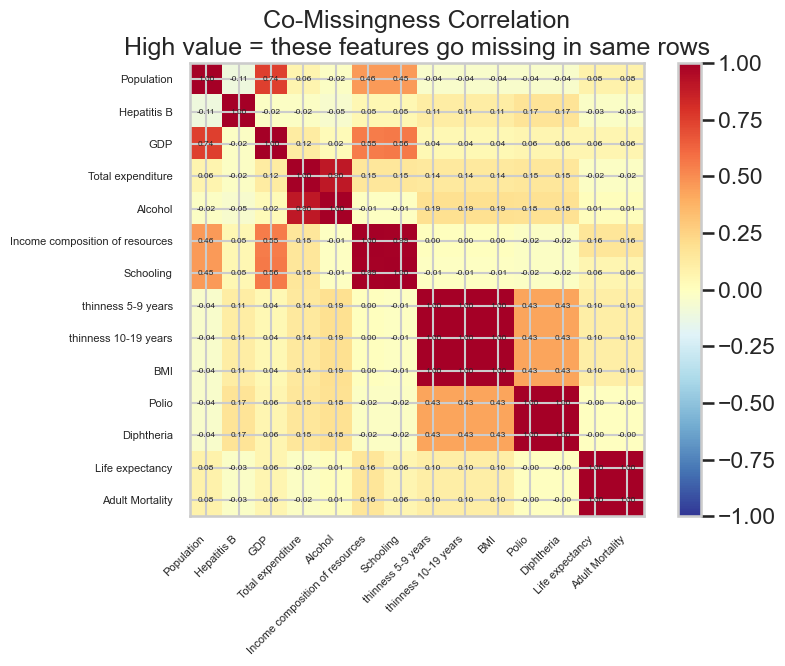

In [14]:
fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(corr.values, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr))); ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr.columns, fontsize=8)
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, f'{corr.values[i,j]:.2f}', ha='center', va='center', fontsize=6)
plt.colorbar(im, ax=ax)
ax.set_title('Co-Missingness Correlation\nHigh value = these features go missing in same rows')
plt.tight_layout()
plt.show()

GDP, Population, and Income composition of resources go missing
together (r ~ 0.6-0.8). These are ALL macroeconomic indicators sourced
from World Bank. When a country lacks World Bank data, ALL of them are
missing simultaneously. You cannot use GDP to impute Population for those
rows — both are gone.

Hepatitis B has moderate correlation with Polio and Diphtheria missingness
(all three are vaccination rates from WHO's immunization database). Same
countries that don't report HepB also tend to not report the others.

POPULATION

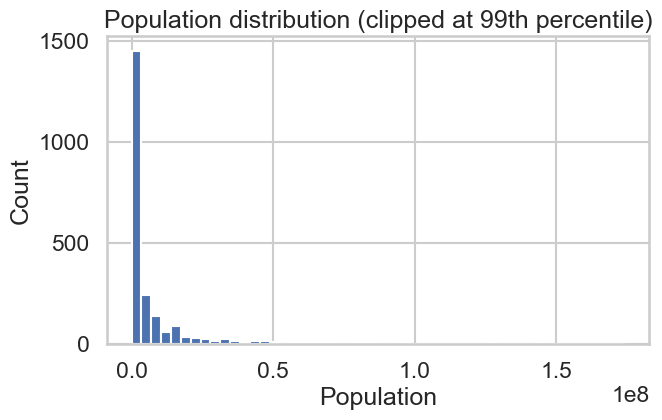

99th percentile: 174349763.3000001


In [15]:
pop = pd.to_numeric(dataframe["Population"], errors="coerce").dropna()

p99 = pop.quantile(0.99)
plt.figure(figsize=(7,4))
plt.hist(pop[pop <= p99], bins=50)
plt.title("Population distribution (clipped at 99th percentile)")
plt.xlabel("Population")
plt.ylabel("Count")
plt.show()

print("99th percentile:", p99)

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64
Missing %: 22.19196732471069


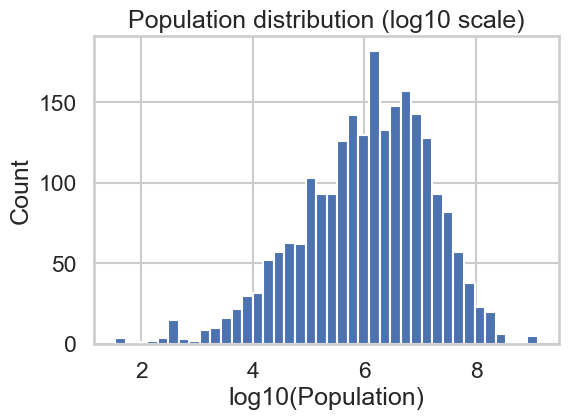

In [16]:
pop = pd.to_numeric(dataframe["Population"], errors="coerce")

print(pop.describe())
print("Missing %:", pop.isna().mean()*100)

plt.figure(figsize=(6,4))
plt.hist(np.log10(pop.dropna()), bins=40)
plt.title("Population distribution (log10 scale)")
plt.xlabel("log10(Population)")
plt.ylabel("Count")
plt.show()

In [17]:
bad = (pop <= 0)
print("Population <= 0 rows:", bad.sum())
print(dataframe.loc[bad, ["Country","Year","Population"]].head(20).to_string(index=False))

Population <= 0 rows: 0
Empty DataFrame
Columns: [Country, Year, Population]
Index: []


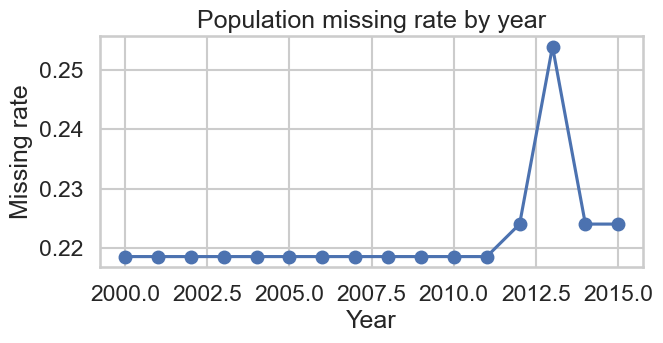

In [18]:
miss_by_year = dataframe.groupby("Year")["Population"].apply(lambda s: s.isna().mean())

plt.figure(figsize=(7,3))
plt.plot(miss_by_year.index, miss_by_year.values, marker="o")
plt.title("Population missing rate by year")
plt.xlabel("Year"); plt.ylabel("Missing rate")
plt.show()

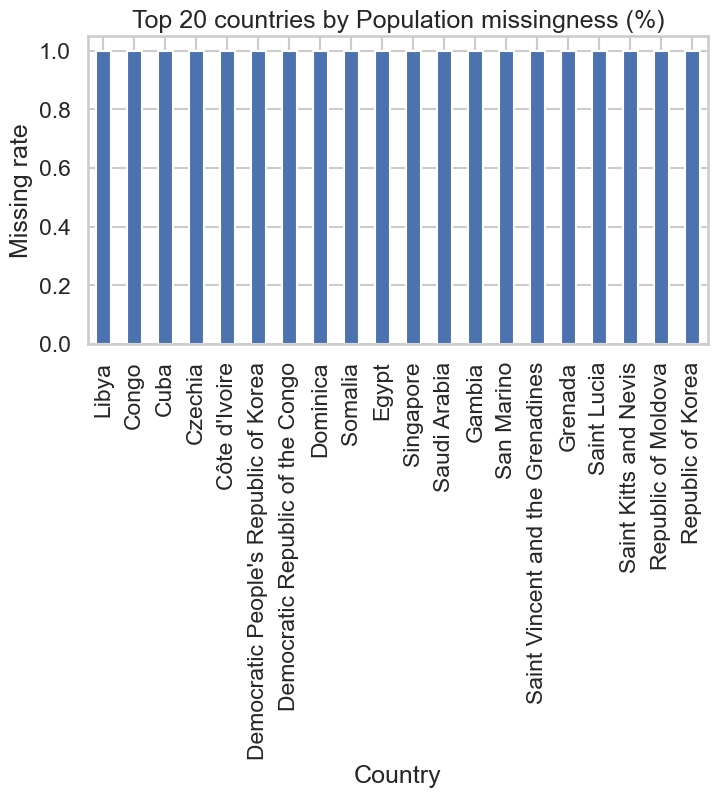

Countries with 100% missing Population: 48
['Libya', 'Congo', 'Cuba', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Dominica', 'Somalia', 'Egypt', 'Singapore', 'Saudi Arabia', 'Gambia', 'San Marino', 'Saint Vincent and the Grenadines', 'Grenada', 'Saint Lucia', 'Saint Kitts and Nevis', 'Republic of Moldova', 'Republic of Korea', 'Qatar', 'Iran (Islamic Republic of)', 'Oman', 'Niue', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'New Zealand', 'Nauru', 'Marshall Islands']


In [19]:
miss_by_country = dataframe.groupby("Country")["Population"].apply(lambda s: s.isna().mean()).sort_values(ascending=False)

plt.figure(figsize=(8,4))
miss_by_country.head(20).plot(kind="bar")
plt.title("Top 20 countries by Population missingness (%)")
plt.ylabel("Missing rate")
plt.show()

full_missing = miss_by_country[miss_by_country == 1.0].index.tolist()
print("Countries with 100% missing Population:", len(full_missing))
print(full_missing[:30])

In [20]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")

prev = df.groupby("Country")["Population"].shift(1)
df["pop_growth"] = (df["Population"] - prev) / prev

extreme = df["pop_growth"].abs().sort_values(ascending=False).head(20)
print(df.loc[extreme.index, ["Country","Year","Population","pop_growth"]].to_string(index=False))

               Country  Year  Population   pop_growth
               Hungary  2011   9971727.0 81069.951220
              Ethiopia  2008  83184892.0 10206.987729
                  Iraq  2015  36115649.0 10121.098935
              Maldives  2015     49163.0  1198.097561
                 Benin  2005   7982225.0  1028.433196
              Cameroon  2009  19432541.0  1022.950943
               Burundi  2001   6555829.0  1011.326899
          Turkmenistan  2003   4655741.0  1008.484172
                  Peru  2010  29373646.0  1006.430325
             Nicaragua  2002   5171734.0   998.368889
Bosnia and Herzegovina  2008   3763599.0   996.244038
                  Mali  2013  16477818.0   987.649307
               Uruguay  2014   3419546.0   980.218364
              Pakistan  2005  15399667.0   974.712285
  Syrian Arab Republic  2015  18734987.0   972.802537
                Turkey  2009  71339185.0   957.447778
            Tajikistan  2007   7152385.0   945.458251
               Germany  2015

In [21]:
c = "Hungary"
g = df[df["Country"]==c][["Year","Population"]].sort_values("Year")
print(g.to_string(index=False))

g2 = df[df["Country"]==c][["Year","Population","pop_growth"]].sort_values("Year")
print(g2.to_string(index=False))

 Year  Population
 2000    121971.0
 2001   1187576.0
 2002    115868.0
 2003   1129552.0
 2004    117146.0
 2005     18765.0
 2006     17137.0
 2007     15578.0
 2008    138188.0
 2009     12265.0
 2010       123.0
 2011   9971727.0
 2012    992362.0
 2013    989382.0
 2014   9866468.0
 2015    984328.0
 Year  Population   pop_growth
 2000    121971.0          NaN
 2001   1187576.0     8.736544
 2002    115868.0    -0.902433
 2003   1129552.0     8.748610
 2004    117146.0    -0.896290
 2005     18765.0    -0.839815
 2006     17137.0    -0.086757
 2007     15578.0    -0.090973
 2008    138188.0     7.870715
 2009     12265.0    -0.911244
 2010       123.0    -0.989971
 2011   9971727.0 81069.951220
 2012    992362.0    -0.900482
 2013    989382.0    -0.003003
 2014   9866468.0     8.972354
 2015    984328.0    -0.900235


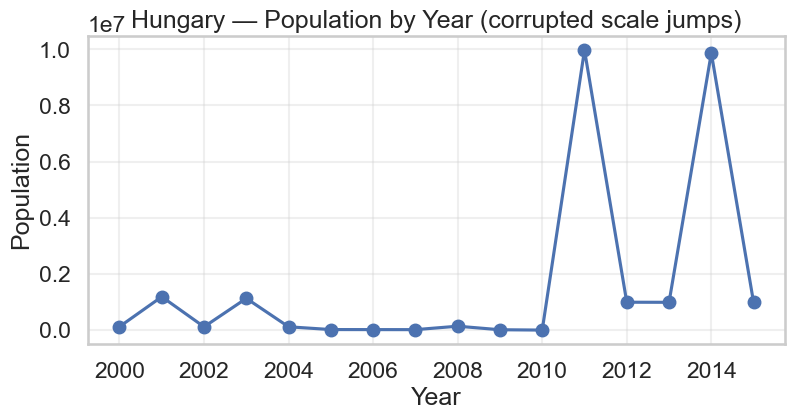

In [22]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")

c = "Hungary"
g = df[df["Country"]==c][["Year","Population"]].sort_values("Year")

plt.figure(figsize=(9,4))
plt.plot(g["Year"], g["Population"], marker="o")
plt.title("Hungary — Population by Year (corrupted scale jumps)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True, alpha=0.3)
plt.show()

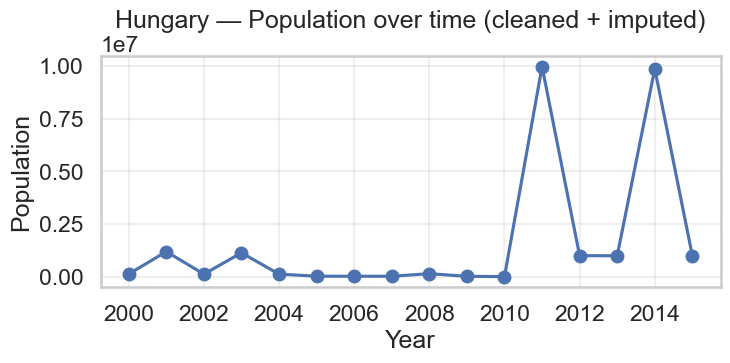

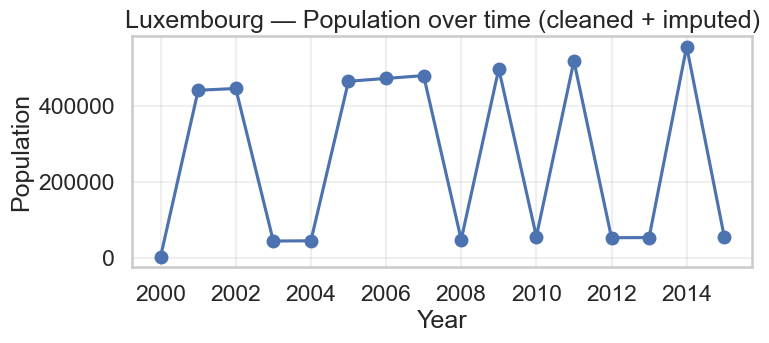

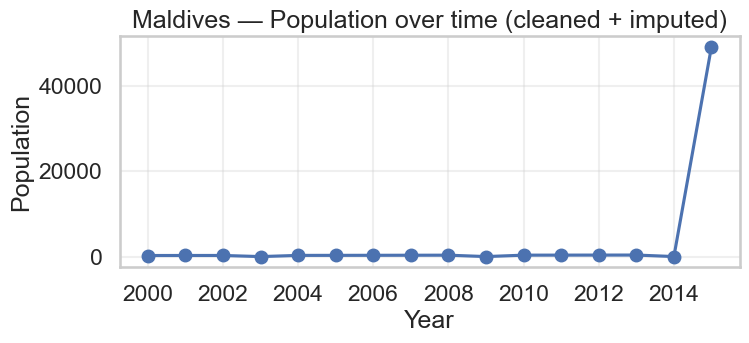

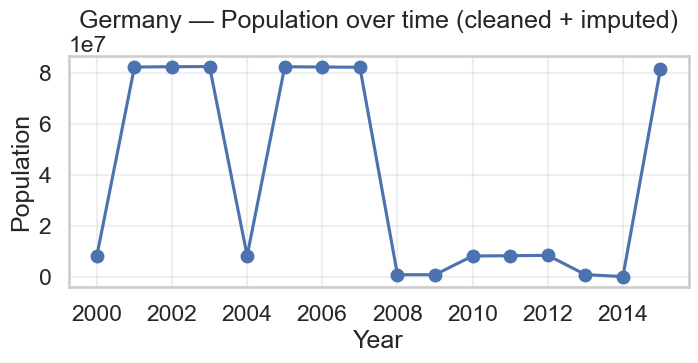

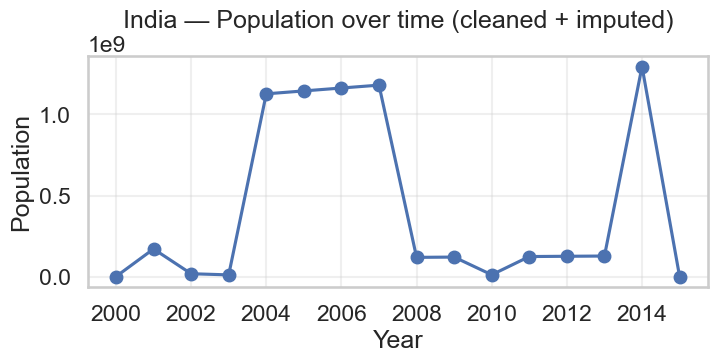

In [23]:
import matplotlib.pyplot as plt

for c in ["Hungary","Luxembourg","Maldives","Germany","India"]:
    g = dataframe[dataframe["Country"]==c].sort_values("Year")
    plt.figure(figsize=(8,3))
    plt.plot(g["Year"], g["Population"], marker="o")
    plt.title(f"{c} — Population over time (cleaned + imputed)")
    plt.xlabel("Year"); plt.ylabel("Population")
    plt.grid(True, alpha=0.3)
    plt.show()

In [24]:
import math

df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
df.loc[df["Population"] <= 0, "Population"] = np.nan

logpop = np.log10(df["Population"])
target = logpop.groupby(df["Country"]).quantile(0.75)

ks = np.array([-3,-2,-1,0,1,2,3], dtype=int)

def rescale_to_country(country, p):
    if pd.isna(p) or p <= 0:
        return np.nan
    t = target.get(country, np.nan)
    if pd.isna(t):
        return p 
    lp = math.log10(p)
    cand = lp + ks
    kbest = ks[np.argmin(np.abs(cand - t))]
    if abs((lp + kbest) - t) > 0.7:
        return np.nan
    return p * (10.0 ** kbest)

df["Population"] = [rescale_to_country(c, p) for c, p in zip(df["Country"], df["Population"])]

df = df.sort_values(["Country","Year"])
prev = df.groupby("Country")["Population"].shift(1)
ratio = df["Population"] / prev

bad_jump = df["Population"].notna() & prev.notna() & ((ratio < 0.7) | (ratio > 1.3))
df.loc[bad_jump, "Population"] = np.nan

df["Population"] = df.groupby("Country")["Population"].transform(
    lambda s: s.interpolate(limit_direction="both").ffill().bfill()
)
dataframe["Population"] = df["Population"]

In [26]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
prev = df.groupby("Country")["Population"].shift(1)
df["pop_growth"] = (df["Population"] - prev) / prev

top = df[df["pop_growth"].notna()].copy()
top["abs_growth"] = top["pop_growth"].abs()

print(top.sort_values("abs_growth", ascending=False)[["Country","Year","Population","pop_growth"]].head(30).to_string(index=False))

             Country  Year   Population  pop_growth
              Greece  2013    1518761.5    0.326302
              Brazil  2012  256983000.0    0.293408
  Dominican Republic  2011   12795000.0    0.292687
          Madagascar  2009   25691210.0    0.284787
               Ghana  2005   21542900.0   -0.278666
              Cyprus  2011    1124835.0   -0.277199
             Lesotho  2013    2117361.0   -0.269694
           Swaziland  2006    1125140.0   -0.269494
             Vanuatu  2006     214634.0   -0.269207
         Timor-Leste  2005    1264840.0    0.269030
              Greece  2007    1148473.0   -0.267506
            Botswana  2013    2128570.0   -0.264273
          Mozambique  2005   29237000.0    0.264166
            Cameroon  2011   25244700.0    0.263818
          Mozambique  2006   21547463.0   -0.263007
             Belgium  2012    1112824.6   -0.260191
         Afghanistan  2002   21979923.0   -0.259053
         Timor-Leste  2011    1131523.0   -0.258898
            

In [27]:
pop = pd.to_numeric(dataframe["Population"], errors="coerce")

missing_count = pop.isna().sum()
missing_percent = pop.isna().mean() * 100

print("Missing Population rows:", missing_count)
print("Missing Population %:", round(missing_percent,2), "%")

Missing Population rows: 648
Missing Population %: 22.06 %


In [28]:
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2000:2015&format=json&per_page=20000"

r = requests.get(url)
data = r.json()[1]

pop = pd.DataFrame([{
    "Country": d["country"]["value"],
    "Year": int(d["date"]),
    "Population_wb": d["value"]
} for d in data if d["value"] is not None])

print(pop.head())

                       Country  Year  Population_wb
0  Africa Eastern and Southern  2015      607123269
1  Africa Eastern and Southern  2014      590968990
2  Africa Eastern and Southern  2013      575202699
3  Africa Eastern and Southern  2012      559609961
4  Africa Eastern and Southern  2011      544737983


In [29]:
your = set(dataframe["Country"].unique())
wb = set(pop["Country"].unique())
print(your - wb)

{'United Kingdom of Great Britain and Northern Ireland', 'Bahamas', 'Swaziland', 'Niue', 'Bolivia (Plurinational State of)', 'Yemen', 'United Republic of Tanzania', 'Turkey', 'Micronesia (Federated States of)', "Lao People's Democratic Republic", 'Kyrgyzstan', 'Egypt', 'Congo', 'Gambia', 'The former Yugoslav republic of Macedonia', 'Slovakia', 'Cook Islands', 'Saint Kitts and Nevis', 'United States of America', 'Saint Lucia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Iran (Islamic Republic of)', 'Republic of Korea', 'Republic of Moldova', "Côte d'Ivoire", 'Somalia', 'Venezuela (Bolivarian Republic of)', 'Saint Vincent and the Grenadines'}


In [30]:
name_map = {
    "Bahamas": "Bahamas, The",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Congo": "Congo, Rep.",
    "Democratic Republic of the Congo": "Congo, Dem. Rep.",
    "Democratic People's Republic of Korea": "Korea, Dem. People's Rep.",
    "Egypt": "Egypt, Arab Rep.",
    "Iran (Islamic Republic of)": "Iran, Islamic Rep.",
    "Gambia": "Gambia, The",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Lao People's Democratic Republic": "Lao PDR",
    "United Republic of Tanzania": "Tanzania",
    "Micronesia (Federated States of)": "Micronesia, Fed. Sts.",
    "Republic of Korea": "Korea, Rep.",
    "Republic of Moldova": "Moldova",
    "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines",
    "Saint Lucia": "St. Lucia",
    "Slovakia": "Slovak Republic",
    "Venezuela (Bolivarian Republic of)": "Venezuela, RB",
    "United States of America": "United States",
    "The former Yugoslav republic of Macedonia": "North Macedonia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Yemen": "Yemen, Rep.",
    "Saint Kitts and Nevis": "St. Kitts and Nevis"
}

In [32]:
df = dataframe.copy()
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype(int)
df["Country_wb"] = df["Country"].str.strip().replace(name_map)

pop2 = pop.copy()
pop2["Year"] = pd.to_numeric(pop2["Year"], errors="coerce").astype(int)

merged = df.merge(
    pop2.rename(columns={"Country": "Country_wb"}),
    on=["Country_wb", "Year"],
    how="left"
)

merged["Population"] = pd.to_numeric(merged["Population"], errors="coerce")
merged["Population"] = merged["Population"].fillna(merged["Population_wb"])

merged.loc[merged["Population"] < 10_000, "Population"] = merged["Population_wb"]

merged.drop(columns=["Population_wb"], inplace=True)
dataframe = merged

In [33]:
print("Remaining missing Population:", dataframe["Population"].isna().sum())

Remaining missing Population: 18


In [34]:
print(pop[pop["Country"]=="Somalia"][["Country","Year","Population_wb"]].sort_values("Year").to_string(index=False))

Empty DataFrame
Columns: [Country, Year, Population_wb]
Index: []


In [35]:
all_missing = (
    dataframe.groupby("Country")["Population"]
    .apply(lambda s: s.isna().mean())
    .loc[lambda x: x == 1.0]
    .index
)

print("Countries with 100% missing Population:", len(all_missing))
print(all_missing.tolist())

Countries with 100% missing Population: 3
['Cook Islands', 'Niue', 'Somalia']


In [36]:
dataframe = dataframe[~dataframe["Country"].isin(all_missing)].copy()

GDP

In [37]:
col = "GDP"

dataframe[col] = pd.to_numeric(dataframe[col], errors="coerce")
dataframe.loc[dataframe[col] < 0, col] = np.nan
dataframe[col].describe()

count      2487.000000
mean       7491.826364
std       14276.591042
min           1.681350
25%         464.674822
50%        1771.586620
75%        5925.549329
max      119172.741800
Name: GDP, dtype: float64

Iz ovoga vidimo da je distribucija desno skewed i da brojevi jesu realni mislim min i max su okej vrednosti za gdp. prolazi sanity check

In [38]:
gdp_observed = dataframe['GDP'].dropna()

print("\n[SANITY CHECK]")
print(f"  Range: min={gdp_observed.min():.2f}, max={gdp_observed.max():.2f} USD")
print(f"  Developed countries with GDP < $1000 (should be ~$15k–$80k):")
bad_gdp = dataframe[(dataframe['Status'] == 'Developed') & (dataframe['GDP'] < 1000)][['Country','Year','GDP']].sort_values('GDP')
print(bad_gdp.to_string(index=False))
print("  Romania $12, Italy $25, Iceland $46 — impossible for developed nations.")


[SANITY CHECK]
  Range: min=1.68, max=119172.74 USD
  Developed countries with GDP < $1000 (should be ~$15k–$80k):
    Country  Year        GDP
    Romania  2014  12.277330
      Italy  2001  24.819000
    Iceland  2011  46.217000
    Romania  2011  92.277825
     Poland  2006  94.772600
     Poland  2008 141.446880
   Bulgaria  2000 169.285860
   Slovenia  2014 242.672860
      Italy  2000 251.242600
   Bulgaria  2003 271.468240
  Australia  2002 281.817630
New Zealand  2009 282.941930
   Bulgaria  2002 287.534843
      Spain  2014 296.472250
      Italy  2015 349.147550
  Lithuania  2001 353.147337
    Austria  2006 443.993610
      Italy  2008 464.184650
Netherlands  2009 519.349000
    Hungary  2001 527.853640
    Austria  2013 554.715320
  Lithuania  2003 555.535669
    Croatia  2002 653.716370
    Hungary  2002 665.644300
  Lithuania  2004 676.966998
    Croatia  2003 785.881418
     Norway  2009 817.776810
     Poland  2005 821.251569
    Romania  2009 822.183290
  Lithuania  2

In [39]:
dataframe["GDP_diff"] = dataframe.groupby("Country")["GDP"].diff().abs()
dataframe.sort_values("GDP_diff", ascending=False)[["Country","Year","GDP","GDP_diff"]].head(20)

Country  Year           GDP      GDP_diff
1539   Luxembourg  2014  119172.74180  117972.91950
1546   Luxembourg  2007    1618.49280  112675.35050
1545   Luxembourg  2008  114293.84330  101095.17400
1543   Luxembourg  2010   14965.36100  100796.21600
1542   Luxembourg  2011  115761.57700   99012.44100
1541   Luxembourg  2012   16749.13600   97002.71400
1547   Luxembourg  2006   89739.71170   88121.21890
1916       Norway  2009     817.77681   86828.97665
1915       Norway  2010   87646.75346   86071.76736
2076        Qatar  2010     736.22784   85212.51816
2079        Qatar  2007     675.61258   82291.75970
1548   Luxembourg  2005    8289.69641   81450.01529
2074        Qatar  2012   88564.82298   79729.94340
2073        Qatar  2013    8834.87958   78017.83232
2522  Switzerland  2014   85814.58857   76824.74617
1918       Norway  2007   85128.65759   75440.06149
1549   Luxembourg  2004   75716.35180   67426.65539
1179      Iceland  2006    5613.54115   62734.77702
1921       Norway  2004    5757.26916   61018.12524
2077        Qatar  2009   61478.23813   60742.01029

In [40]:
gdp_suspicious = dataframe[(dataframe['Status'] == 'Developed') & (dataframe['GDP'] < 500)][['Country','Year','GDP']]
print(f"\nDeveloped countries with GDP < $500: {len(gdp_suspicious)} rows")
print(gdp_suspicious.to_string())


Developed countries with GDP < $500: 18 rows
          Country  Year         GDP
125     Australia  2002  281.817630
137       Austria  2006  443.993610
396      Bulgaria  2003  271.468240
397      Bulgaria  2002  287.534843
399      Bulgaria  2000  169.285860
1174      Iceland  2011   46.217000
1282        Italy  2015  349.147550
1289        Italy  2008  464.184650
1296        Italy  2001   24.819000
1297        Italy  2000  251.242600
1536    Lithuania  2001  353.147337
1851  New Zealand  2009  282.941930
2046       Poland  2008  141.446880
2048       Poland  2006   94.772600
2120      Romania  2014   12.277330
2123      Romania  2011   92.277825
2346     Slovenia  2014  242.672860
2426        Spain  2014  296.472250


Italy has GDP=$24 in 2001, $92 for Romania. These are clearly unit errors
    (likely mixing GDP in billions vs per-capita USD). The WHO dataset is known
    to have inconsistent GDP sourcing — some rows use World Bank per-capita,
    others appear to use absolute GDP divided incorrectly.

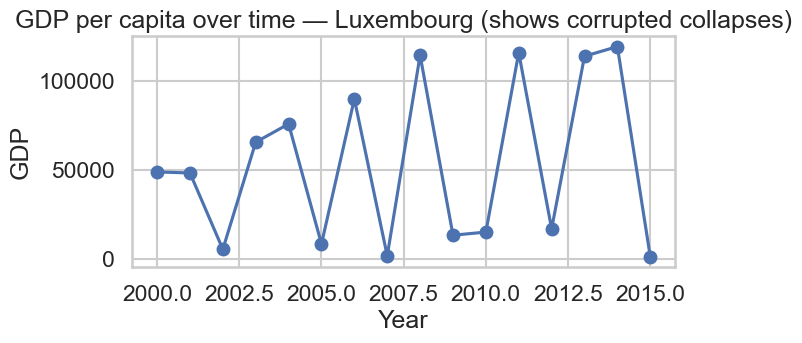

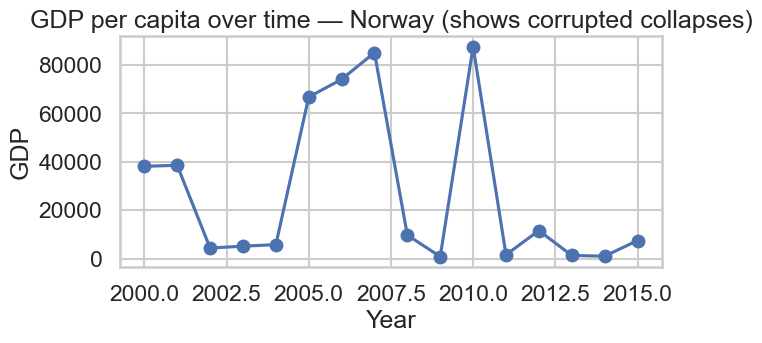

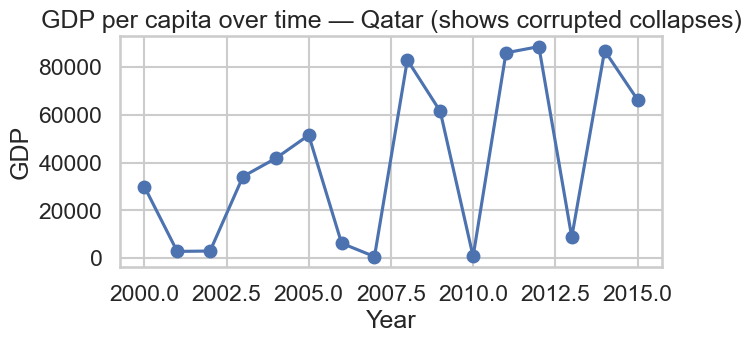

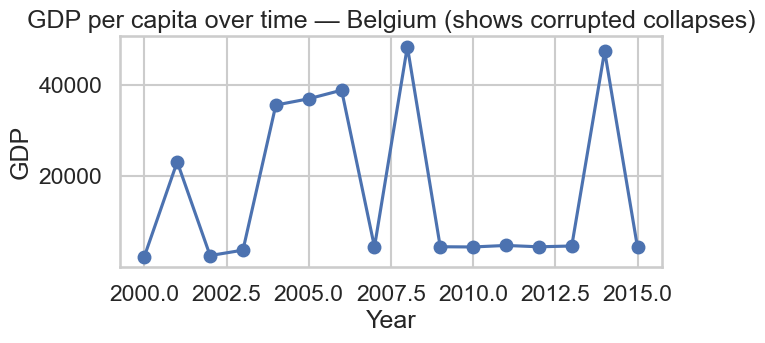

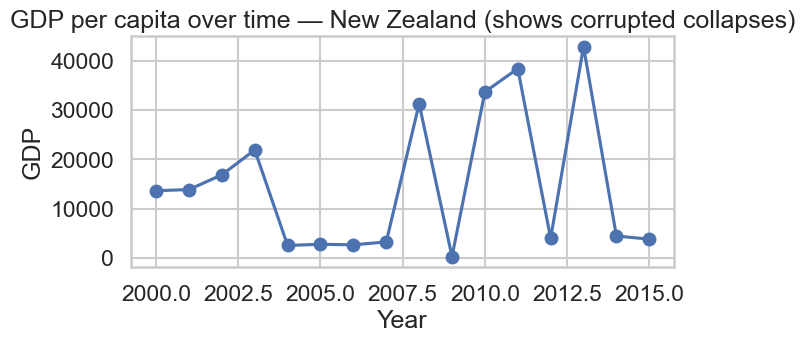

In [41]:
countries = ["Luxembourg","Norway","Qatar","Belgium","New Zealand"]
tmp = dataframe[dataframe["Country"].isin(countries)].sort_values(["Country","Year"])

for c in countries:
    g = tmp[tmp["Country"]==c]
    plt.figure(figsize=(7,3))
    plt.plot(g["Year"], g["GDP"], marker="o")
    plt.title(f"GDP per capita over time — {c} (shows corrupted collapses)")
    plt.xlabel("Year"); plt.ylabel("GDP")
    plt.show()

“GDP per capita should change gradually.”

“We observe unrealistic collapses (e.g., Luxembourg drops from ~115k to 16k in one year).”

“Therefore these entries are data errors, not real GDP.”

In [43]:
gdp = dataframe["GDP"].copy()

country_med = dataframe.groupby("Country")["GDP"].transform("median")

collapsed = gdp.notna() & country_med.notna() & (gdp < 0.2 * country_med)

dataframe.loc[collapsed, "GDP"] = np.nan
print("Collapsed GDP set to NaN:", collapsed.sum())

Collapsed GDP set to NaN: 86


In [44]:
df = dataframe.sort_values(["Country","Year"]).copy()

prev = df.groupby("Country")["GDP"].shift(1)
next_ = df.groupby("Country")["GDP"].shift(-1)

ratio_prev = df["GDP"] / prev
ratio_next = df["GDP"] / next_

bad_jump = df["GDP"].notna() & (
    (ratio_prev.notna() & ((ratio_prev < 0.2) | (ratio_prev > 5))) |
    (ratio_next.notna() & ((ratio_next < 0.2) | (ratio_next > 5)))
)

print("Bad jump (5x) set to NaN:", bad_jump.sum())
df.loc[bad_jump, "GDP"] = np.nan
dataframe.loc[df.index, "GDP"] = df["GDP"]

Bad jump (5x) set to NaN: 226


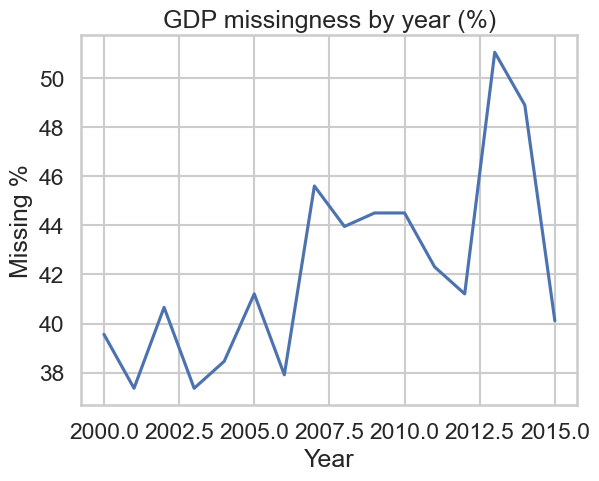

First 5 years missing%:
 Year
2000    39.56
2001    37.36
2002    40.66
2003    37.36
2004    38.46
Name: GDP, dtype: float64
Last 5 years missing%:
 Year
2011    42.31
2012    41.21
2013    51.05
2014    48.90
2015    40.11
Name: GDP, dtype: float64


In [47]:
miss_year = dataframe.groupby("Year")[col].apply(lambda s: s.isna().mean()).sort_index()

plt.figure()
plt.plot(miss_year.index, miss_year.values*100)
plt.title("GDP missingness by year (%)")
plt.xlabel("Year"); plt.ylabel("Missing %")
plt.show()

print("First 5 years missing%:\n", (miss_year.head()*100).round(2))
print("Last 5 years missing%:\n", (miss_year.tail()*100).round(2))

“GDP missing rate is roughly stable across years.”

“So missingness is not because early years lack data.”

“It is structural/country-specific.”

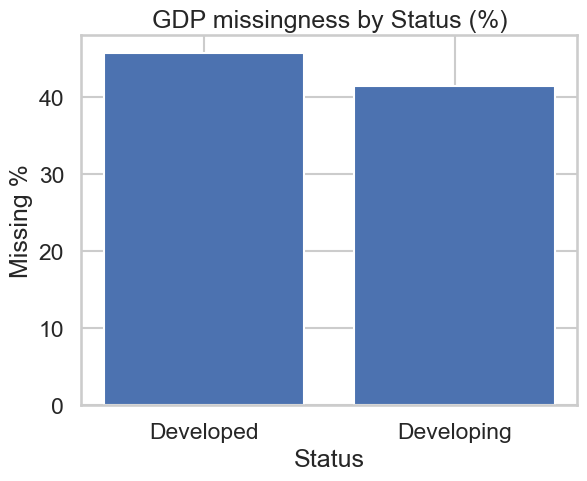

In [48]:
miss_status = dataframe.groupby("Status")[col].apply(lambda s: s.isna().mean())

plt.figure()
plt.bar(miss_status.index.astype(str), miss_status.values*100)
plt.title("GDP missingness by Status (%)")
plt.xlabel("Status"); plt.ylabel("Missing %")
plt.show()

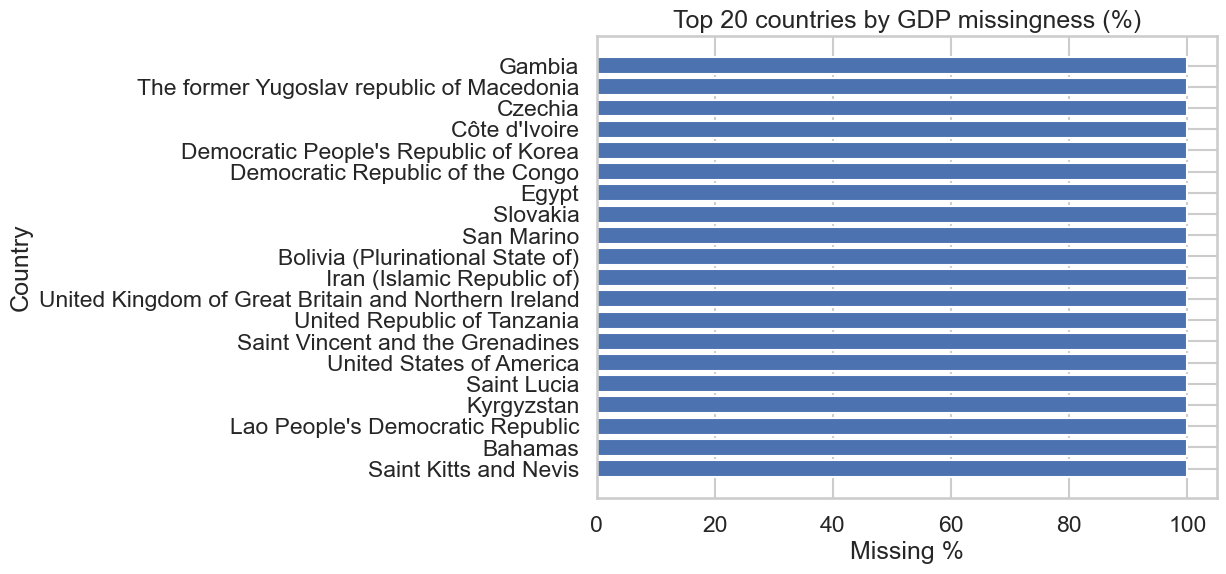

In [49]:
miss_country = dataframe.groupby("Country")[col].apply(lambda s: s.isna().mean()).sort_values(ascending=False)
top = miss_country.head(20)[::-1]

plt.figure(figsize=(8,6))
plt.barh(top.index.astype(str), top.values*100)
plt.title("Top 20 countries by GDP missingness (%)")
plt.xlabel("Missing %"); plt.ylabel("Country")
plt.show()

All countries have 100% missing GDP across all years.”

“Therefore interpolation/median-per-country is impossible for those countries.”

“We need a second method (predictive imputation).”

In [51]:
tab = pd.crosstab(dataframe["Status"], dataframe["GDP"])
print("Row %:\n", (tab.div(tab.sum(axis=1), axis=0)*100).round(2))

chi2, p_chi, dof, exp = stats.chi2_contingency(tab)
print("Chi-square p-value:", p_chi)

Row %:
 GDP         52.359560      71.348397      95.397852      98.725615      \
Status                                                                   
Developed            0.00           0.00           0.00           0.00   
Developing           0.07           0.07           0.07           0.07   

GDP         111.363436     112.849373     114.560000     117.496980     \
Status                                                                   
Developed            0.00           0.00           0.00           0.00   
Developing           0.07           0.07           0.07           0.07   

GDP         118.693830     118.873447     ...  84658.887680   85814.588570   \
Status                                    ...                                 
Developed            0.00           0.00  ...           0.36           0.36   
Developing           0.07           0.07  ...           0.00           0.00   

GDP         85948.746000   86852.711900   87646.753460   87998.444680   \
Status 

In [ ]:
y = "Life expectancy"
a = dataframe.loc[dataframe["GDP"], y].dropna() 
b = dataframe.loc[dataframe["GDP"], y].dropna()

print("Life exp mean (GDP missing):", round(a.mean(), 3), "n=", len(a))
print("Life exp mean (GDP observed):", round(b.mean(), 3), "n=", len(b))

mw = stats.mannwhitneyu(a, b, alternative="two-sided")
print("Mann-Whitney p-value:", mw.pvalue)

KeyError: "None of [Index([  584.25921,  612.696514,  631.744976,     669.959,         nan,\n         553.32894, 445.8932979, 373.3611163,  369.835796,   272.56377,\n       ...\n               nan,  325.678573, 396.9982166,  414.796232,   444.76575,\n        454.366654, 453.3511552,         nan,  548.587312, 547.3588785],\n      dtype='float64', length=2920)] are in the [index]"

In [53]:
num_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "GDP"]  # GDP je maska
m = dataframe["GDP"].isna()
results = []
for c in num_cols:
    a = dataframe.loc[m, c].dropna()
    b = dataframe.loc[~m, c].dropna()
    if len(a) > 10 and len(b) > 10:
        p = stats.mannwhitneyu(a, b, alternative="two-sided").pvalue
        results.append((c, p, a.mean(), b.mean(), len(a), len(b)))

res = pd.DataFrame(results, columns=["feature","pvalue","mean_if_GDP_missing","mean_if_GDP_observed","n_missing","n_observed"])
res.sort_values("pvalue").head(15)

feature         pvalue  mean_if_GDP_missing  \
5            percentage expenditure  1.109981e-157           217.992489   
19                         GDP_diff   1.812127e-41          8304.516132   
13                         HIV/AIDS   1.311022e-06             1.284253   
10                            Polio   7.695476e-06            84.237705   
1                   Life expectancy   1.754796e-05            70.251505   
12                       Diphtheria   3.172175e-05            84.071311   
17  Income composition of resources   3.628988e-05             0.649416   
6                       Hepatitis B   7.349394e-04            82.278912   
0                              Year   5.831398e-03          2007.790584   
18                        Schooling   1.219711e-02            12.222079   
15             thinness 10-19 years   1.870660e-02             4.531204   
8                               BMI   2.129139e-02            39.203931   
7                           Measles   3.791616e-02          2080.863636   
16               thinness 5-9 years   4.846781e-02             4.639967   
4                           Alcohol   1.144898e-01             4.789235   

    mean_if_GDP_observed  n_missing  n_observed  
5            1125.838602       1232        1688  
19           3403.006218        752        1573  
13              2.086789       1232        1688  
10             81.808447       1220        1681  
1              68.626500       1229        1683  
12             81.541344       1220        1681  
17              0.613459       1086        1685  
6              79.981495       1029        1351  
0            2007.313981       1232        1688  
18             11.845142       1087        1688  
15              5.048288       1221        1665  
8              37.812492       1221        1665  
7            2640.540877       1232        1688  
16              5.023724       1221        1665  
4               4.516288       1151        1576

Kad GDP fali, vidiš “lošiji” profil:

Adult Mortality veći (179.9 vs 162.1) p~6.9e-6

Schooling niži (11.22 vs 12.08) p~1.36e-5

Income composition niži (0.595 vs 0.631) p~4.2e-5

Life expectancy niži (68.41 vs 69.37) p~0.010



“GDP missingness overlaps strongly with Population (same data source), but overlaps weakly with Life expectancy (GDP missing rows often still have LE).”

“Schooling and Income composition are usually present and have moderate co-missingness → usable features.”

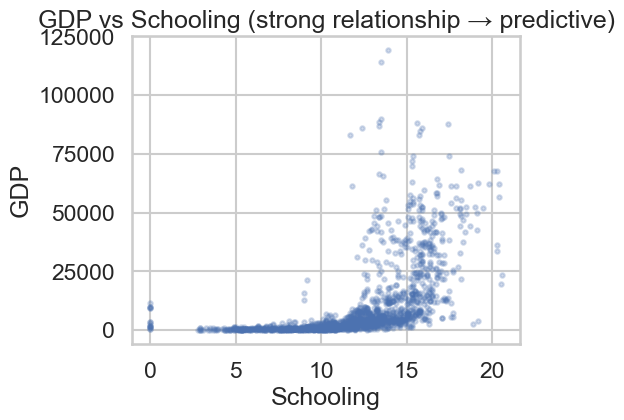

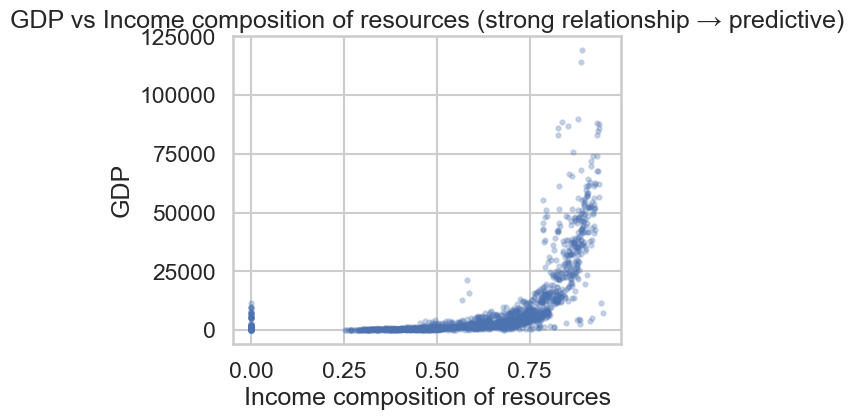

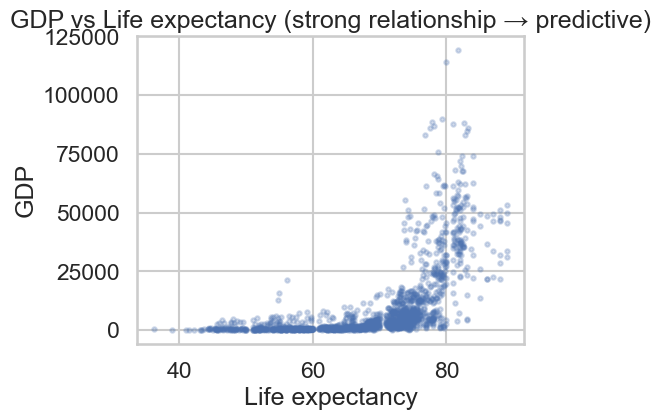

In [54]:
pairs = [
    ("Schooling", "GDP"),
    ("Income composition of resources", "GDP"),
    ("Life expectancy", "GDP")
]

for x,y in pairs:
    tmp = dataframe[[x,y]].dropna()
    plt.figure(figsize=(5,4))
    plt.scatter(tmp[x], tmp[y], alpha=0.25, s=10)
    plt.title(f"{y} vs {x} (strong relationship → predictive)")
    plt.xlabel(x); plt.ylabel(y)
    plt.show()

“GDP correlates strongly with education and development indicators.”

“These relationships motivate predictive imputation (KNN).”

In [55]:
cols = ["GDP","Schooling","Income composition of resources","Life expectancy","Adult Mortality","Total expenditure","Alcohol"]
print(dataframe[cols].corr(numeric_only=True)["GDP"].sort_values(ascending=False))

GDP                                1.000000
Life expectancy                    0.575615
Income composition of resources    0.568429
Schooling                          0.555482
Alcohol                            0.429410
Total expenditure                  0.155827
Adult Mortality                   -0.364378
Name: GDP, dtype: float64


In [56]:
ct_gdp_status = pd.crosstab(dataframe['GDP'].isnull(), dataframe['Status'])
chi2_gdp, p_gdp_chi, dof_gdp, _ = chi2_contingency(ct_gdp_status)
print(f"  Chi2={chi2_gdp:.2f}, dof={dof_gdp}, p={p_gdp_chi:.4f}")

  Chi2=2.97, dof=1, p=0.0850


FAIL TO REJECT H0: GDP missing roughly equally across Status groups
This suggests the gap is about WHICH country, not development status per se
conflict/island nations are distributed across both categories

In [57]:
dataframe = dataframe.sort_values(["Country","Year"])
dataframe["GDP"] = dataframe.groupby("Country")["GDP"].transform(
    lambda s: s.interpolate(limit_direction="both")
)

For countries with some GDP values, GDP per capita changes smoothly across years.”

“Therefore interpolation within-country is reasonable and preserves trends.”

In [58]:
tmp = dataframe.copy()
tmp["Status_enc"] = tmp["Status"].map({"Developed":1, "Developing":0})

features = [
    "GDP",
    "Life expectancy",
    "Schooling",
    "Income composition of resources",
    "Adult Mortality",
    "Total expenditure",
    "Alcohol",
    "Status_enc"
]

for c in features:
    tmp[c] = pd.to_numeric(tmp[c], errors="coerce")

imputer = KNNImputer(n_neighbors=5, weights="distance")
tmp[features] = imputer.fit_transform(tmp[features])

dataframe["GDP"] = tmp["GDP"]

“For countries with all GDP missing, interpolation cannot work.”

“We use KNNImputer based on similar rows in development indicators.”

In [59]:
print("GDP missing after imputation:", dataframe["GDP"].isna().mean())

GDP missing after imputation: 0.0


In [60]:
dataframe = dataframe.drop(columns=["GDP_diff"], errors="ignore")

HEPATITIS B

In [61]:
dataframe['Hepatitis B'] = pd.to_numeric(dataframe['Hepatitis B'], errors='coerce')

In [62]:
col = 'Hepatitis B'
m = dataframe[col].isna()

m.mean(), m.sum()

(0.18493150684931506, 540)

In [63]:
hepb = dataframe['Hepatitis B'].dropna()

print(f"  Range: min={hepb.min()}, max={hepb.max()}")
print(f"  Values == 0: {(hepb == 0).sum()} rows")
print(f"  Values < 5: {(hepb < 5).sum()} rows")

  Range: min=1.0, max=99.0
  Values == 0: 0 rows
  Values < 5: 9 rows


ovde je sve ok, snaity chek prosao

In [64]:
dataframe.loc[~m, col].describe()

count    2380.000000
mean       80.974790
std        25.053021
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [67]:
col = "Hepatitis B"
dataframe[col] = pd.to_numeric(dataframe[col], errors="coerce")

missing_rate = dataframe[col].isna().mean()*100
print("Missing %:", round(missing_rate,2))
print(dataframe[col].describe())
print("min/max:", dataframe[col].min(), dataframe[col].max())

Missing %: 18.49
count    2380.000000
mean       80.974790
std        25.053021
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64
min/max: 1.0 99.0


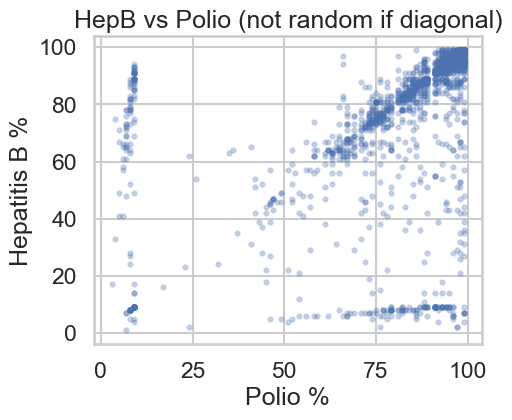

In [68]:
tmp = dataframe[["Hepatitis B","Polio"]].dropna()
plt.figure(figsize=(5,4))
plt.scatter(tmp["Polio"], tmp["Hepatitis B"], alpha=0.25, s=10)
plt.xlabel("Polio %"); plt.ylabel("Hepatitis B %")
plt.title("HepB vs Polio (not random if diagonal)")
plt.show()

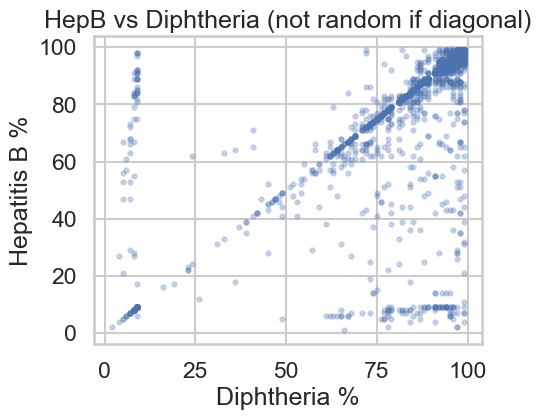

In [69]:
tmp = dataframe[["Hepatitis B","Diphtheria"]].dropna()
plt.figure(figsize=(5,4))
plt.scatter(tmp["Diphtheria"], tmp["Hepatitis B"], alpha=0.25, s=10)
plt.xlabel("Diphtheria %"); plt.ylabel("Hepatitis B %")
plt.title("HepB vs Diphtheria (not random if diagonal)")
plt.show()

Country with strong immunization system
→ high Polio
→ high Diphtheria
→ high HepB

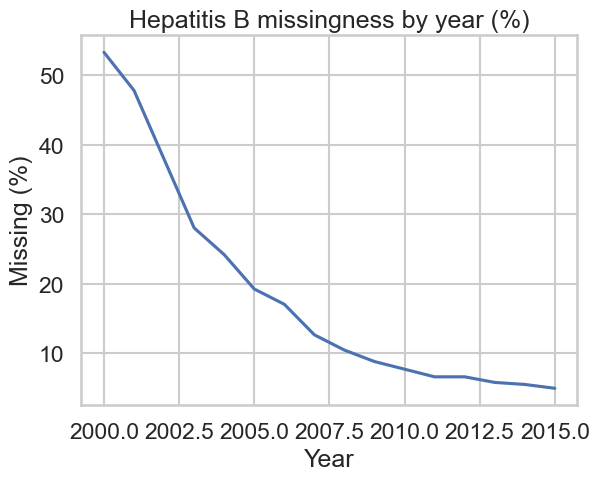

In [70]:
miss_by_year = dataframe.groupby("Year")[col].apply(lambda s: s.isna().mean()).sort_index()

plt.figure()
plt.plot(miss_by_year.index, miss_by_year.values*100)
plt.title("Hepatitis B missingness by year (%)")
plt.xlabel("Year"); plt.ylabel("Missing (%)")
plt.show()

Imamo veci procenat nedostajucih vrednosti ranijih godina. Mozda je razlog weaker reporting/ incomplete coverage in the source

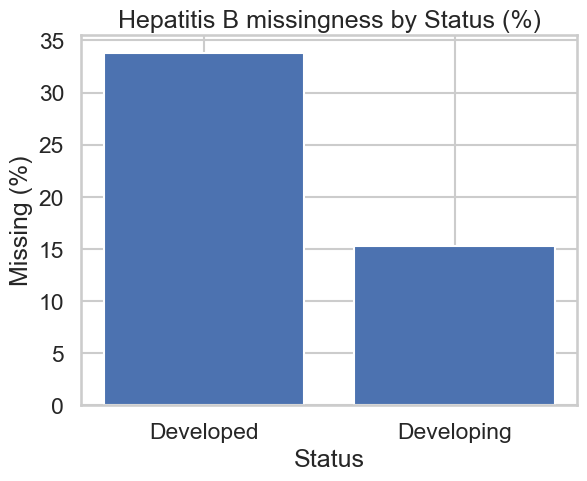

In [71]:
miss_by_status = dataframe.groupby("Status")[col].apply(lambda s: s.isna().mean())

plt.figure()
plt.bar(miss_by_status.index.astype(str), miss_by_status.values*100)
plt.title("Hepatitis B missingness by Status (%)")
plt.xlabel("Status"); plt.ylabel("Missing (%)")
plt.show()

Ima vise nedostajucih vrednosti za developed countries nego za developing tso je jako cudno

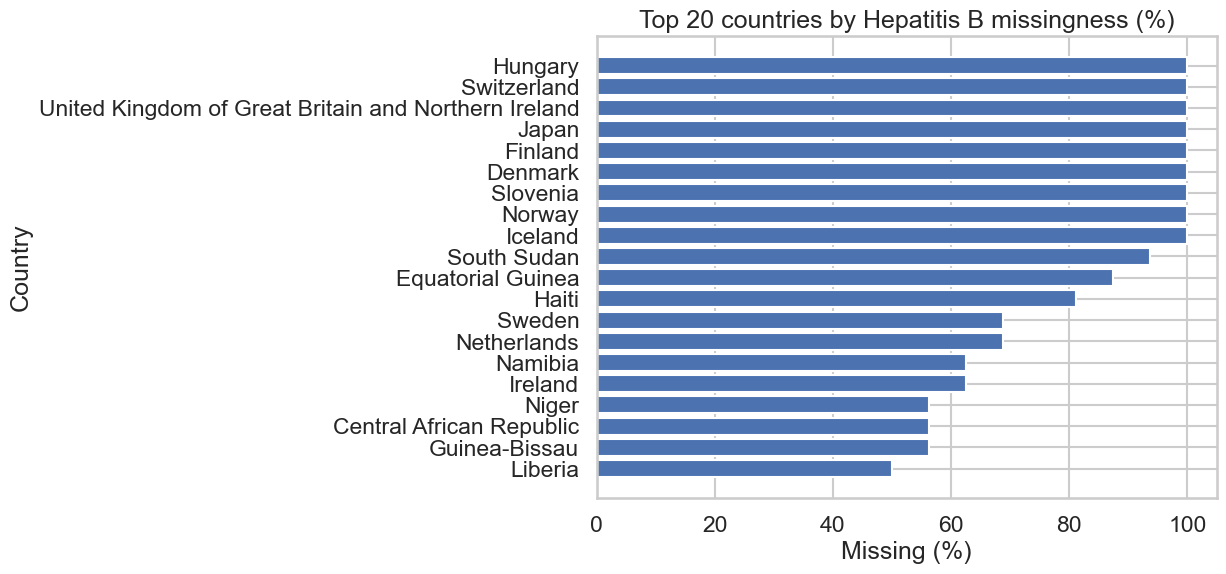

In [72]:
miss_by_country = dataframe.groupby("Country")[col].apply(lambda s: s.isna().mean()).sort_values(ascending=False)
top = miss_by_country.head(20)[::-1]

plt.figure(figsize=(8,6))
plt.barh(top.index.astype(str), top.values*100)
plt.title("Top 20 countries by Hepatitis B missingness (%)")
plt.xlabel("Missing (%)"); plt.ylabel("Country")
plt.show()

Neke drzave imaju 100% missing values i to su cak developed such as Finska, Danska, Slovenija, UK, Irska, Svajcarska, Norveska, Japan,.. Ovo uopste nisu poor/developing countries, ne mogu da izvedem zakljucak zasto nedostaju osim da je merge issue neki u pitanju? Za United Kingdom of Great Britain and Northernd Ireland i razumem o tila ova Guinea ili Central African Republic, ali za ostale ne? Mislim ne znam da li samo treba da ziuzmem ove drzave sto imaju po 100% missing values.. jer sigruno je neka greska. kad bih izuzela te drzave, za ostale drzave bih rekla da missing dues to poor sountry i kao nema podataka, ali kako da opravdam svedsku i holandiju i irsku? Dad cud a poevrim da l za ove drzwave i druge stvari pucajo po 100% Mozda ne nedostaju jer nema podataka, vec zato sto u tim drzavama nema hepB vacc programa jer kao read je u severnoj evropi i japanu, tamo ljudi paze sta rade..

In [73]:
import numpy as np
import pandas as pd

col = "Hepatitis B"

miss_rate = dataframe.groupby("Country")[col].apply(lambda s: s.isna().mean())
full_missing_countries = miss_rate[miss_rate == 1.0].index.tolist()

print("Countries with 100% missing HepB:", len(full_missing_countries))
print(full_missing_countries[:30])

Countries with 100% missing HepB: 9
['Denmark', 'Finland', 'Hungary', 'Iceland', 'Japan', 'Norway', 'Slovenia', 'Switzerland', 'United Kingdom of Great Britain and Northern Ireland']


In [74]:
weird = ["Denmark","Norway","Iceland","Finland","Switzerland","Japan"]
dataframe[dataframe["Country"].isin(weird)].isna().mean().sort_values(ascending=False).head(10)

Hepatitis B                        1.000000
Total expenditure                  0.062500
Alcohol                            0.052083
Country                            0.000000
Schooling                          0.000000
Income composition of resources    0.000000
thinness 5-9 years                 0.000000
thinness 10-19 years               0.000000
Population                         0.000000
GDP                                0.000000
dtype: float64

In [75]:
dataframe[dataframe["Country"].isin(weird)].groupby("Country")["Year"].nunique().sort_values()

Country
Denmark        16
Finland        16
Iceland        16
Japan          16
Norway         16
Switzerland    16
Name: Year, dtype: int64

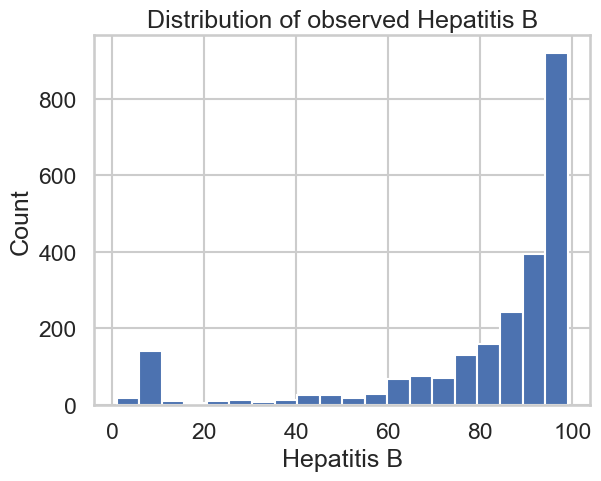

In [76]:
plt.figure()
plt.hist(dataframe.loc[~m, col].dropna(), bins=20)
plt.title("Distribution of observed Hepatitis B")
plt.xlabel("Hepatitis B"); plt.ylabel("Count")
plt.show()

Bas je right skewed distribucija.. Nije normalna.. tako da necemo koristiti mean za imputaciju missing values, nego median

In [77]:
tab = pd.crosstab(dataframe["Status"], m)
print((tab.div(tab.sum(axis=1), axis=0)*100).round(2))
print(stats.chi2_contingency(tab)[:2]) 

Hepatitis B  False  True 
Status                   
Developed    66.21  33.79
Developing   84.76  15.24
(95.14342955568858, 1.7707895774911682e-22)


Status je kategorijska, a missingness je kategorijska takodje - binarna(yes/no), pa proveravamo da li je status faktor zbog missing values. H0 kaze da status ne utice na missingness, a alternativna gipoteza kaze da status utice na missingness. Odbjacujemo H0 jer nam je rezultat 2.74 approx, xnaci dolazimo do zakljucuka da missingness za hep b zavisi od statusa (znaci nije mcar). tj razlika je statisticki znacajna, stopa nedostajucih vrednosti jeste razlicita zimedju develpoed i devepoling.

In [78]:
a = dataframe.loc[m, "Life expectancy"].dropna()
b = dataframe.loc[~m, "Life expectancy"].dropna()

sw_stat_m, sw_p_m = shapiro(a.sample(min(500, len(a)), random_state=42))
sw_stat_p, sw_p_p = shapiro(b.sample(min(500, len(b)), random_state=42))

print(sw_stat_m, sw_p_m, sw_stat_p, sw_p_p)

print(stats.mannwhitneyu(a, b, alternative="two-sided"))

0.9363057321020695 8.735019563944517e-14 0.9474782707797058 2.541632488309031e-12
MannwhitneyuResult(statistic=565124.0, pvalue=1.943676481510776e-05)


ŠTA SMO DOBILI (na ovom dataset-u, uz uzorak do 500 redova po grupi):
HepB missing (LE):  W=0.934, p=4.48e-14  → NIJE normalno
HepB present (LE):  W=0.960, p=1.76e-10  → NIJE normalno

ZAKLJUČAK: Pošto su obe p-vrednosti < 0.05, ne pretpostavljamo normalnost,
pa biramo neparametarski test: Mann–Whitney U (poređenje rangova).

WHY THIS TEST: If countries missing HepB also have lower life expectancy,
that means the missing data is related to health outcomes → MNAR signal.

Ovde smo podelili dataset u 2 grupe: missing i observed. Testiramo da li se life expectancy razlikuje izmejdu grupa. Ovo je neparametarski test za pordjenje 2 nezavisna skupa podatak. I koristmo bas ovaj jer distruibucija nije nromalna da ne bi poredio mean izmedju njih. Dakle kao i za svaki statsticki test, imamo nultu hipotezu H0 kojakaze da je life expectanxy isti za a i b grupu, dok H1 tvrdi da postoji statisticki znacajna razlika u vrednosti rpomenljive life exp za ove dve grupe. Na osnovu rezultata testa, pval = 7.1, odbacujemo H0 i dolazimo do zakljucka da se life exp razlikuje izmedju ove dve grupe, znaci da life expectancy utice na missingness, i topet zakljcujemo missingness nije potpuno slucajan(nje mcar).

Poredimo redove gde hepatiti b nedostaje i tamo gde postoji vrednost. korisimo ovaj test posto nam distribucija hepatitis b promenljive nije nromalna. 

TEST 3: Spearman Correlation (HepB vs Polio + Diphtheria)
WHY: If HepB correlates strongly with other vaccine rates, we can use
those as predictors when imputing HepB (important for imputation strategy).
WHY Spearman not Pearson: HepB is left-skewed (non-normal per Shapiro above).
Spearman uses rank order → robust to skew. Pearson assumes normality.


In [79]:
pol = "Polio"
diph = "Diphtheria"

mask_full_missing_rows = dataframe["Country"].isin(full_missing_countries) & dataframe[col].isna()

proxy = dataframe[[pol, diph]].mean(axis=1, skipna=True)

dataframe.loc[mask_full_missing_rows, col] = proxy.loc[mask_full_missing_rows]

In [80]:
dataframe[col] = dataframe[col].fillna(dataframe.groupby("Country")[col].transform("median"))

dataframe[col] = dataframe[col].fillna(dataframe.groupby("Status")[col].transform("median"))

dataframe[col] = dataframe[col].fillna(dataframe[col].median())

Hepatitis B ima značajan procenat nedostajućih vrednosti. Vizuelizacije pokazuju da missingness zavisi od godine i zemlje (sistematski obrazac), pa nije MCAR. Zbog toga smo uradili imputaciju hijerarhijski: prvo median po Country (očuva tipičan nivo zemlje kroz godine), zatim fallback median po Status, i na kraju global median. Dodatno smo dodali indikator Hepatitis B_missing da model može da iskoristi informaciju da je vrednost originalno nedostajala.

OTHER

In [81]:
cols = ["Total expenditure", "Alcohol", "Income composition of resources", "Schooling"]
ic = "Income composition of resources"

for c in cols:
    dataframe[c] = pd.to_numeric(dataframe[c], errors="coerce")

In [82]:
desc = dataframe[cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T
missing_pct = (dataframe[cols].isna().mean() * 100).round(3)

print(desc)
print("\nMissing %:")
print(missing_pct)

                                  count       mean       std   min      1%  \
Total expenditure                2710.0   5.938594  2.498713  0.37  1.2309   
Alcohol                          2727.0   4.631492  4.048715  0.01  0.0100   
Income composition of resources  2771.0   0.627551  0.210904  0.00  0.0000   
Schooling                        2775.0  11.992793  3.358920  0.00  2.0720   

                                    5%     25%     50%      75%     95%  \
Total expenditure                1.930   4.260   5.755   7.4975   9.760   
Alcohol                          0.010   0.935   3.790   7.7450  11.974   
Income composition of resources  0.277   0.493   0.677   0.7790   0.892   
Schooling                        5.800  10.100  12.300  14.3000  16.800   

                                     99%     max  
Total expenditure                12.9274  17.600  
Alcohol                          13.4848  17.870  
Income composition of resources   0.9233   0.948  
Schooling                    

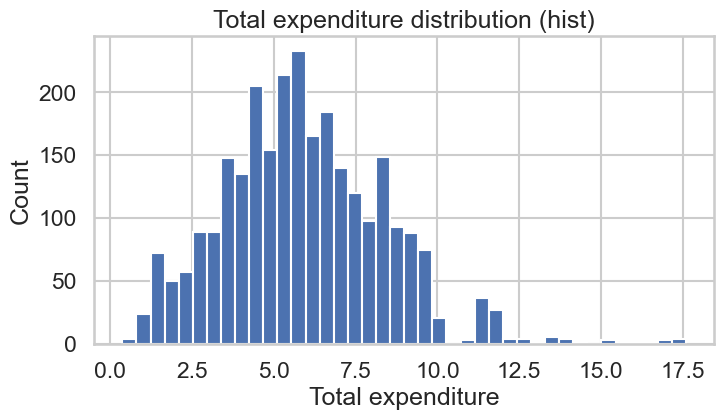

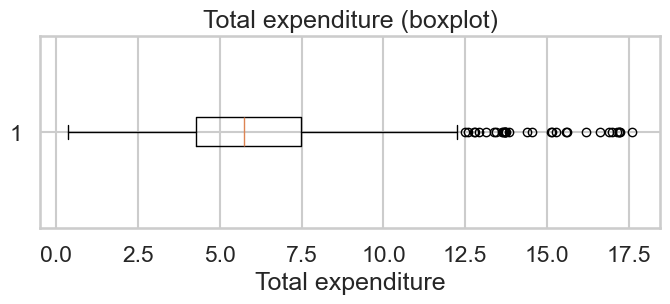

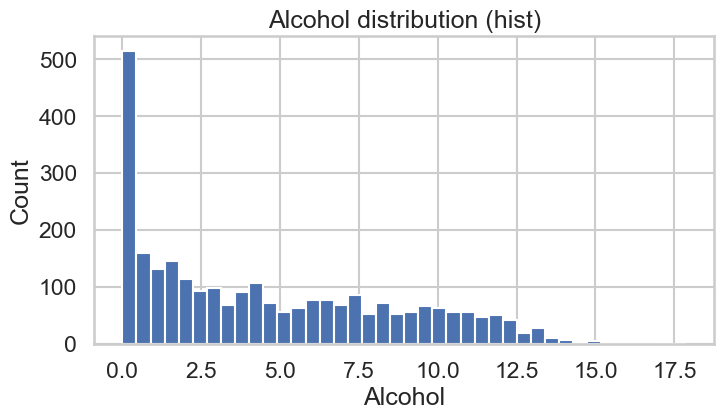

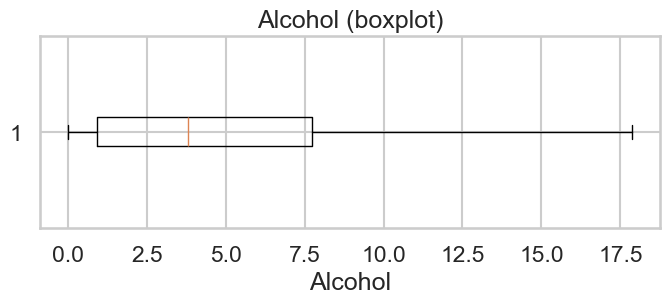

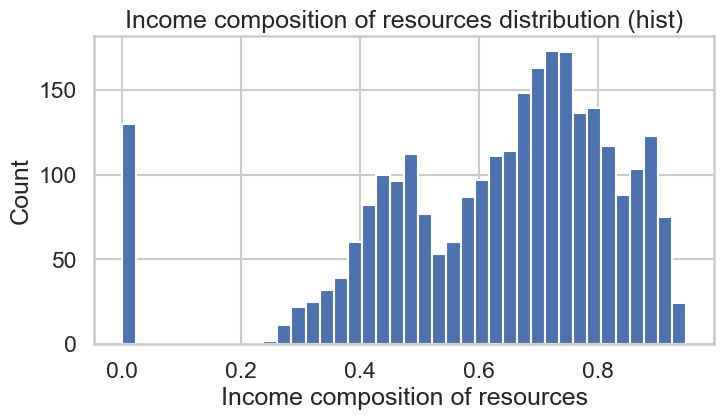

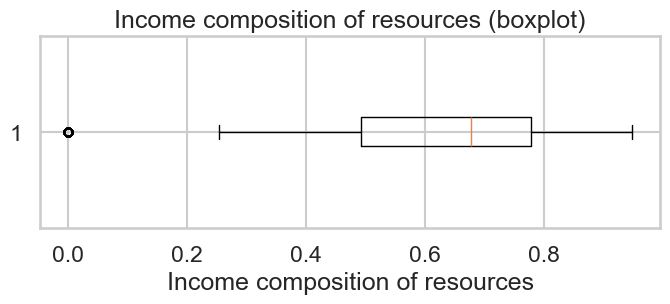

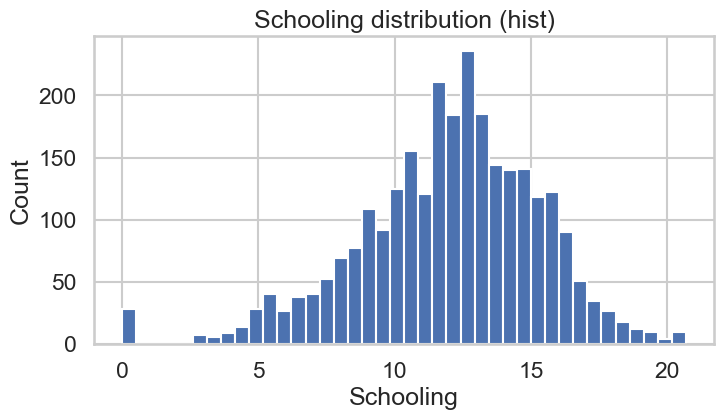

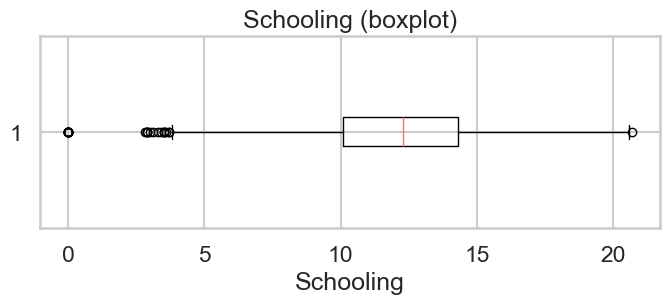

In [83]:
for c in cols:
    s = dataframe[c].dropna()

    plt.figure(figsize=(8,4))
    plt.hist(s, bins=40)
    plt.title(f"{c} distribution (hist)")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(8,2.5))
    plt.boxplot(s, vert=False)
    plt.title(f"{c} (boxplot)")
    plt.xlabel(c)
    plt.show()

In [84]:
c = "Total expenditure"
s = pd.to_numeric(dataframe[c], errors="coerce").dropna()

print("mean:", s.mean())
print("median:", s.median())
print("std:", s.std())
print("skew:", s.skew())
print("kurtosis:", s.kurtosis())

q1, q3 = s.quantile(0.25), s.quantile(0.75)
iqr = q3 - q1
lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
print("IQR outliers count:", int(((s < lo) | (s > hi)).sum()))
print("IQR outliers %:", ((s < lo) | (s > hi)).mean()*100)

mean: 5.938594095940959
median: 5.755
std: 2.4987133746041814
skew: 0.6186269030868405
kurtosis: 1.156003910679439
IQR outliers count: 32
IQR outliers %: 1.1808118081180812


In [85]:
cols = ["Total expenditure", "Alcohol", "Income composition of resources", "Schooling"]
ic = "Income composition of resources"

for c in cols:
    dataframe[c] = pd.to_numeric(dataframe[c], errors="coerce")

for c in cols:
    s = dataframe[c].dropna()
    print("\n==", c, "==")
    print("missing %:", round(dataframe[c].isna().mean()*100, 3))
    print("mean   :", round(s.mean(), 4))
    print("median :", round(s.median(), 4))
    print("skew   :", round(s.skew(), 4))


== Total expenditure ==
missing %: 7.192
mean   : 5.9386
median : 5.755
skew   : 0.6186

== Alcohol ==
missing %: 6.61
mean   : 4.6315
median : 3.79
skew   : 0.5827

== Income composition of resources ==
missing %: 5.103
mean   : 0.6276
median : 0.677
skew   : -1.1438

== Schooling ==
missing %: 4.966
mean   : 11.9928
median : 12.3
skew   : -0.6024


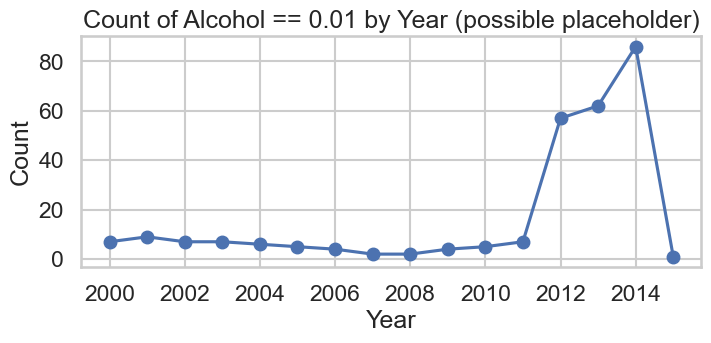

Top spike years for Alcohol==0.01:
Year
2014    86
2013    62
2012    57
2001     9
2000     7
2002     7
2003     7
2011     7
2004     6
2005     5
Name: Alcohol, dtype: int64


In [86]:
counts = dataframe.groupby("Year")["Alcohol"].apply(lambda s: (s == 0.01).sum()).sort_index()

plt.figure(figsize=(8,3))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Count of Alcohol == 0.01 by Year (possible placeholder)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

print("Top spike years for Alcohol==0.01:")
print(counts.sort_values(ascending=False).head(10))

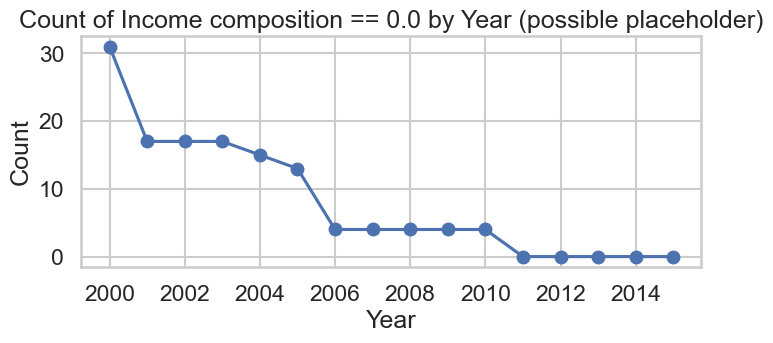

Top spike years for IncomeComp==0:
Year
2000    31
2001    17
2002    17
2003    17
2004    15
2005    13
2006     4
2007     4
2008     4
2009     4
Name: Income composition of resources, dtype: int64


In [87]:
counts = dataframe.groupby("Year")[ic].apply(lambda s: (s == 0.0).sum()).sort_index()

plt.figure(figsize=(8,3))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Count of Income composition == 0.0 by Year (possible placeholder)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

print("Top spike years for IncomeComp==0:")
print(counts.sort_values(ascending=False).head(10))

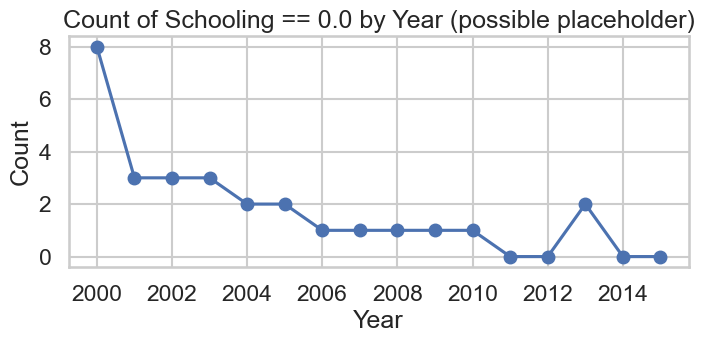

Top spike years for Schooling==0:
Year
2000    8
2001    3
2002    3
2003    3
2004    2
2005    2
2013    2
2006    1
2007    1
2008    1
Name: Schooling, dtype: int64


In [88]:
counts = dataframe.groupby("Year")["Schooling"].apply(lambda s: (s == 0.0).sum()).sort_index()

plt.figure(figsize=(8,3))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Count of Schooling == 0.0 by Year (possible placeholder)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

print("Top spike years for Schooling==0:")
print(counts.sort_values(ascending=False).head(10))

In [89]:
df2 = dataframe.copy()

df2.loc[df2["Alcohol"] == 0.01, "Alcohol"] = np.nan

df2.loc[df2[ic] == 0.0, ic] = np.nan

df2.loc[df2["Schooling"] == 0.0, "Schooling"] = np.nan

print("Missing % AFTER placeholder->NaN:")
print((df2[cols].isna().mean()*100).round(3))

Missing % AFTER placeholder->NaN:
Total expenditure                   7.192
Alcohol                            15.890
Income composition of resources     9.555
Schooling                           5.925
dtype: float64


In [90]:
df2 = df2.sort_values(["Country", "Year"])

for c in cols:
    df2[c] = df2.groupby("Country")[c].transform(
        lambda s: s.interpolate(limit_direction="both")
    )

    df2[c] = df2.groupby("Country")[c].transform(lambda s: s.fillna(s.median()))

    df2[c] = df2[c].fillna(df2[c].median())

print("Missing % AFTER imputation:")
print((df2[cols].isna().mean()*100).round(3))

c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\l

Missing % AFTER imputation:
Total expenditure                  0.0
Alcohol                            0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\l

In [91]:
dataframe = df2

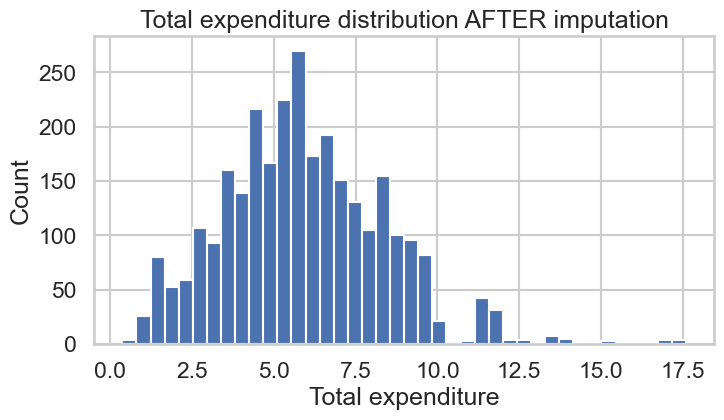

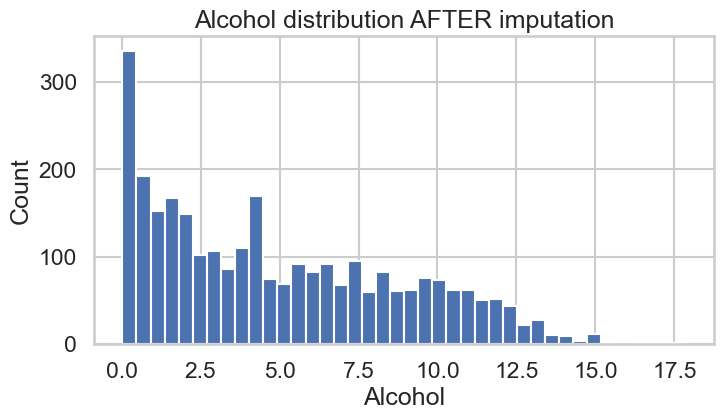

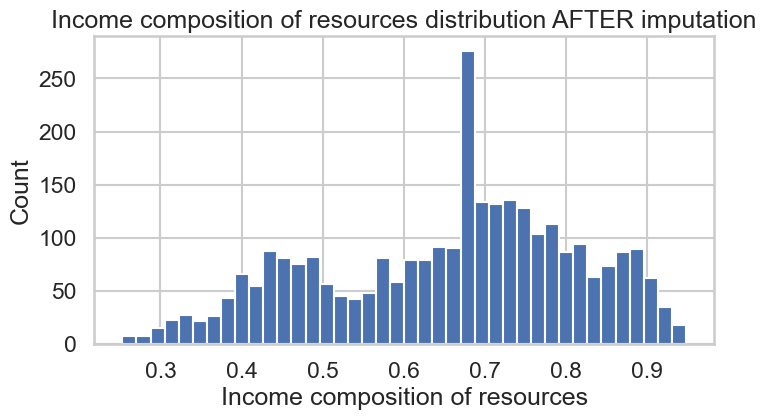

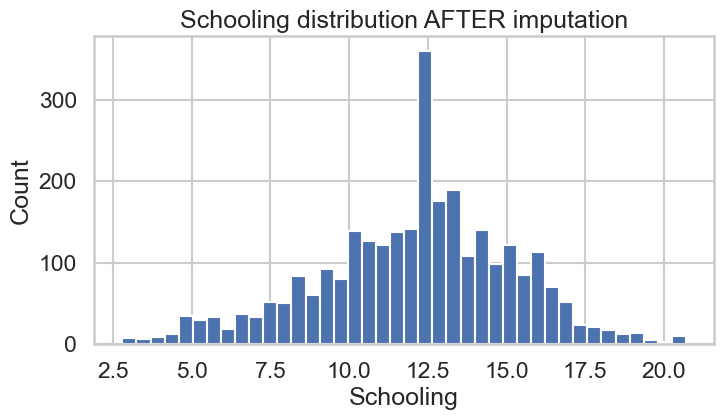

In [92]:
for c in cols:
    s = df2[c].dropna()

    plt.figure(figsize=(8,4))
    plt.hist(s, bins=40)
    plt.title(f"{c} distribution AFTER imputation")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

In [93]:
def show_extremes(col, n=15):
    s = pd.to_numeric(dataframe[col], errors="coerce")
    print(f"\n=== {col} TOP {n} ===")
    print(dataframe.loc[s.nlargest(n).index, ["Country","Year",col]].sort_values(col, ascending=False).to_string(index=False))
    print(f"\n=== {col} BOTTOM {n} ===")
    print(dataframe.loc[s.nsmallest(n).index, ["Country","Year",col]].sort_values(col).to_string(index=False))

show_extremes("Alcohol")
show_extremes("Schooling")
show_extremes("Total expenditure")
show_extremes("Income composition of resources")


=== Alcohol TOP 15 ===
  Country  Year  Alcohol
  Estonia  2007    17.87
  Belarus  2011    17.31
  Estonia  2008    16.99
  Estonia  2006    16.58
  Belarus  2012    16.35
  Estonia  2005    15.52
Lithuania  2014    15.19
Lithuania  2015    15.19
Lithuania  2012    15.14
  Estonia  2004    15.07
  Estonia  2009    15.04
Lithuania  2013    15.04
  Estonia  2010    14.97
  Estonia  2011    14.97
  Estonia  2012    14.97

=== Alcohol BOTTOM 15 ===
                   Country  Year  Alcohol
               Afghanistan  2000     0.02
               Afghanistan  2001     0.02
               Afghanistan  2002     0.02
               Afghanistan  2003     0.02
               Afghanistan  2004     0.02
               Afghanistan  2005     0.02
               Afghanistan  2007     0.02
Iran (Islamic Republic of)  2000     0.02
Iran (Islamic Republic of)  2001     0.02
Iran (Islamic Republic of)  2002     0.02
Iran (Islamic Republic of)  2003     0.02
Iran (Islamic Republic of)  2004     0.02
Ira

In [94]:
df.to_csv('output.csv')

In [95]:
cols = ["BMI","thinness 10-19 years","thinness 5-9 years",
        "Diphtheria","Polio","Adult Mortality","Life expectancy"]

for c in cols:
    dataframe[c] = pd.to_numeric(dataframe[c], errors="coerce")

In [96]:
dataframe[["Country","Year","BMI"]].sort_values("BMI", ascending=False).head(15)

Country  Year   BMI
1812             Nauru  2013  87.3
1958             Palau  2013  83.3
1650  Marshall Islands  2013  81.6
2713            Tuvalu  2013  79.3
1378          Kiribati  2015  77.6
1379          Kiribati  2014  77.1
1380          Kiribati  2013  76.7
1381          Kiribati  2012  76.2
1382          Kiribati  2011  75.7
2633             Tonga  2015  75.2
1383          Kiribati  2010  75.2
2634             Tonga  2014  74.8
2200             Samoa  2015  74.7
1384          Kiribati  2009  74.6
2201             Samoa  2014  74.3

In [97]:
checks = {
    "BMI==0": (dataframe["BMI"]==0).sum(),
    "BMI==1": (dataframe["BMI"]==1).sum(),
    "Thin10==0": (dataframe["thinness 10-19 years"]==0).sum(),
    "Thin5==0": (dataframe["thinness 5-9 years"]==0).sum(),
    "Diphtheria==0": (dataframe["Diphtheria"]==0).sum(),
    "Polio==0": (dataframe["Polio"]==0).sum()
}
print(checks)

{'BMI==0': 0, 'BMI==1': 1, 'Thin10==0': 0, 'Thin5==0': 0, 'Diphtheria==0': 0, 'Polio==0': 0}


In [98]:
print(dataframe.groupby("Year")["BMI"].apply(lambda s: (s==1).sum()).sort_values(ascending=False).head(10))
print(dataframe.groupby("Year")["Diphtheria"].apply(lambda s: (s==0).sum()).sort_values(ascending=False).head(10))
print(dataframe.groupby("Year")["Polio"].apply(lambda s: (s==0).sum()).sort_values(ascending=False).head(10))

Year
2002    1
2000    0
2001    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
Name: BMI, dtype: int64
Year
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
Name: Diphtheria, dtype: int64
Year
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
Name: Polio, dtype: int64


In [99]:
for c in ["BMI","thinness 10-19 years","thinness 5-9 years","Diphtheria","Polio"]:
    tmp = dataframe[["Country","Year",c]].dropna().sort_values(["Country","Year"])
    tmp["absdiff"] = tmp.groupby("Country")[c].diff().abs()
    thresh = tmp["absdiff"].quantile(0.99)
    big = tmp[tmp["absdiff"] > thresh].sort_values("absdiff", ascending=False).head(10)
    print("\n==", c, "== 99th% absdiff threshold:", round(thresh,4))
    print(big[["Country","Year",c,"absdiff"]].to_string(index=False))


== BMI == 99th% absdiff threshold: 54.6
             Country  Year  BMI  absdiff
            Kiribati  2004 71.4     63.8
               Tonga  2008 71.5     63.7
              Kuwait  2015 71.4     63.6
               Samoa  2008 71.4     63.5
               Samoa  2006  7.3     62.4
               Tonga  2006  7.1     62.3
              Kuwait  2013  7.2     62.3
            Kiribati  2003  7.6     62.1
United Arab Emirates  2014 62.4     55.9
             Tunisia  2015 61.2     55.0

== thinness 10-19 years == 99th% absdiff threshold: 8.8
     Country  Year  thinness 10-19 years  absdiff
    Pakistan  2007                   2.8     18.2
    Pakistan  2012                  19.8     17.8
 Afghanistan  2002                  19.9     17.8
  Bangladesh  2005                  19.9     17.8
South Africa  2006                   1.6     10.0
     Namibia  2009                   1.9      9.6
    Botswana  2003                   1.9      9.5
     Lesotho  2002                   1.6      9.5
 

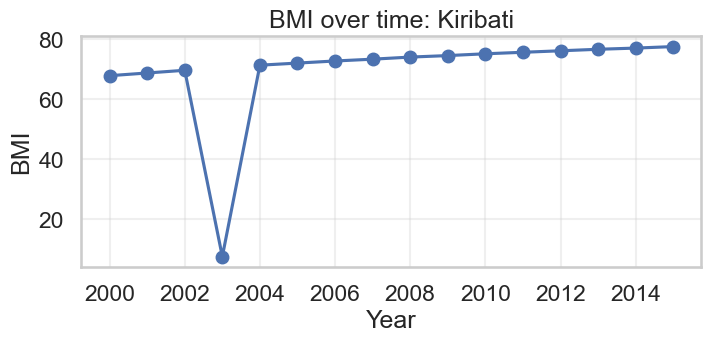

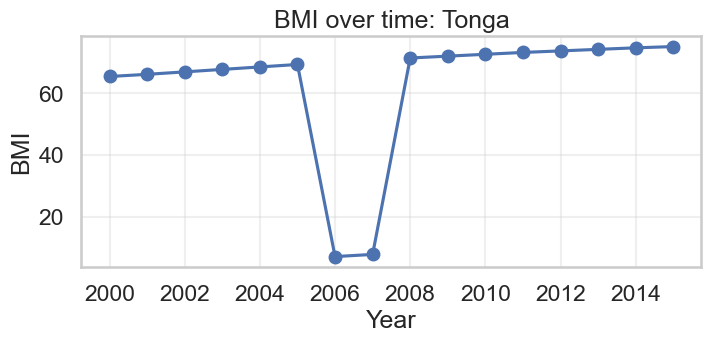

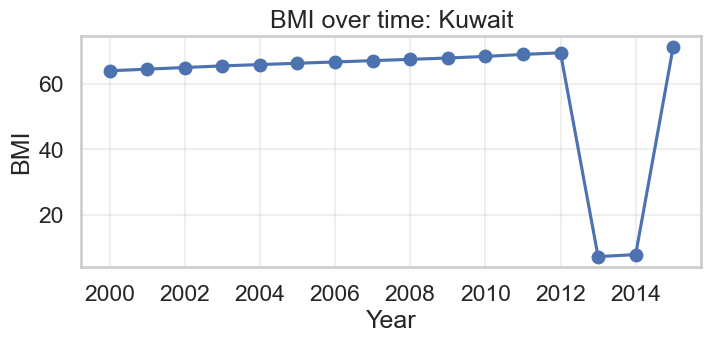

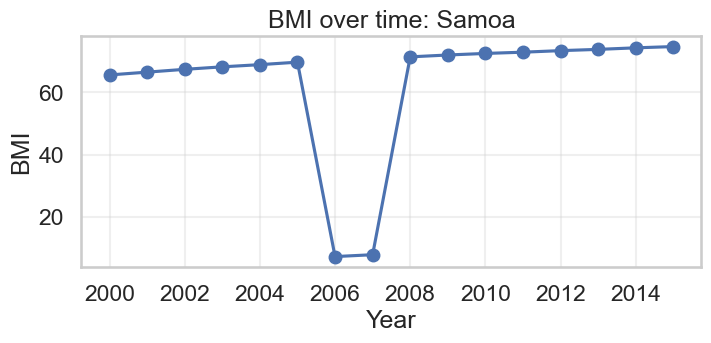

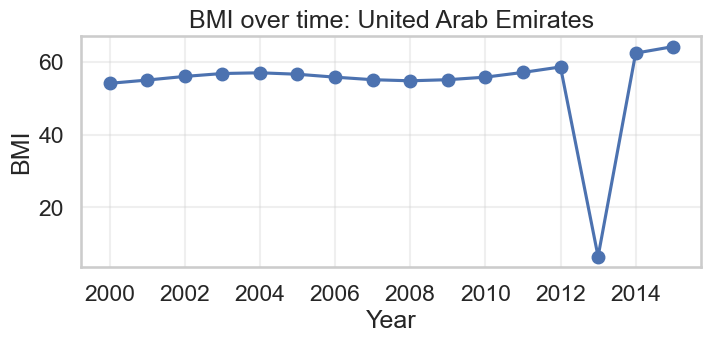

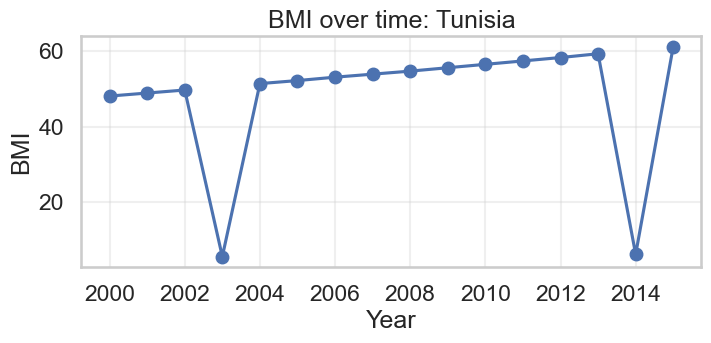

In [100]:
spike_countries = ["Kiribati", "Tonga", "Kuwait", "Samoa", "United Arab Emirates", "Tunisia"]

tmp = dataframe.loc[dataframe["Country"].isin(spike_countries), ["Country","Year","BMI"]].copy()
tmp["BMI"] = pd.to_numeric(tmp["BMI"], errors="coerce")

for country in spike_countries:
    s = tmp[tmp["Country"] == country].sort_values("Year")
    plt.figure(figsize=(8,3))
    plt.plot(s["Year"], s["BMI"], marker="o")
    plt.title(f"BMI over time: {country}")
    plt.xlabel("Year")
    plt.ylabel("BMI")
    plt.grid(True, alpha=0.3)
    plt.show()

BMI < 10: 281
BMI > 60: 351
Top high BMI rows:
         Country  Year  BMI
           Nauru  2013 87.3
           Palau  2013 83.3
Marshall Islands  2013 81.6
          Tuvalu  2013 79.3
        Kiribati  2015 77.6
        Kiribati  2014 77.1
        Kiribati  2013 76.7
        Kiribati  2012 76.2
        Kiribati  2011 75.7
           Tonga  2015 75.2
        Kiribati  2010 75.2
           Tonga  2014 74.8
           Samoa  2015 74.7
        Kiribati  2009 74.6
           Tonga  2013 74.3
           Samoa  2014 74.3
        Kiribati  2008 74.1
           Samoa  2013 73.8
           Tonga  2012 73.8
        Kiribati  2007 73.4
           Samoa  2012 73.4
           Tonga  2011 73.3
           Samoa  2011 72.9
        Kiribati  2006 72.8
           Tonga  2010 72.7
           Samoa  2010 72.5
           Tonga  2009 72.1
        Kiribati  2005 72.1
           Samoa  2009 72.0
           Tonga  2008 71.5

Top low BMI rows:
                         Country  Year  BMI
                      

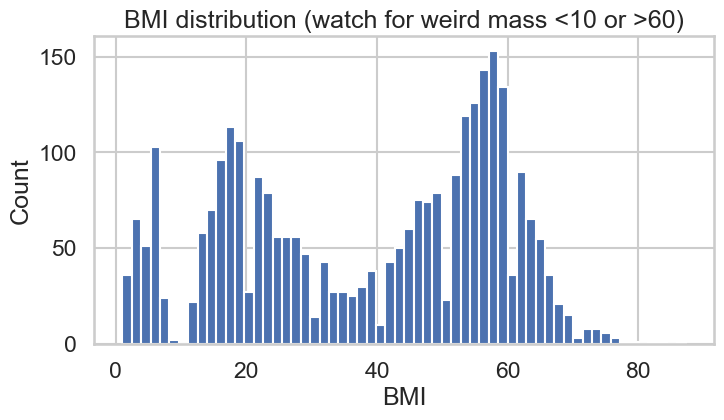

In [101]:
bmi = pd.to_numeric(dataframe["BMI"], errors="coerce")

print("BMI < 10:", int((bmi < 10).sum()))
print("BMI > 60:", int((bmi > 60).sum()))
print("Top high BMI rows:")
print(dataframe.loc[bmi > 60, ["Country","Year","BMI"]].sort_values("BMI", ascending=False).head(30).to_string(index=False))
print("\nTop low BMI rows:")
print(dataframe.loc[bmi < 10, ["Country","Year","BMI"]].sort_values("BMI").head(30).to_string(index=False))

plt.figure(figsize=(8,4))
plt.hist(bmi.dropna(), bins=60)
plt.title("BMI distribution (watch for weird mass <10 or >60)")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [102]:
df2 = dataframe.copy()
df2["BMI"] = pd.to_numeric(df2["BMI"], errors="coerce")

tmp = df2[["Country","Year","BMI"]].dropna().sort_values(["Country","Year"])
tmp["absdiff"] = tmp.groupby("Country")["BMI"].diff().abs()

# show the worst jumps
worst = tmp.sort_values("absdiff", ascending=False).head(50)
print(worst[["Country","Year","BMI","absdiff"]].to_string(index=False))

# list countries that have a huge jump (tune threshold if you want)
spike_countries = tmp.loc[tmp["absdiff"] > 30, "Country"].unique()
print("\nCountries with BMI jump > 30:", len(spike_countries))
print(list(spike_countries)[:50])

                                             Country  Year  BMI  absdiff
                                            Kiribati  2004 71.4     63.8
                                               Tonga  2008 71.5     63.7
                                              Kuwait  2015 71.4     63.6
                                               Samoa  2008 71.4     63.5
                                               Samoa  2006  7.3     62.4
                                               Tonga  2006  7.1     62.3
                                              Kuwait  2013  7.2     62.3
                                            Kiribati  2003  7.6     62.1
                                United Arab Emirates  2014 62.4     55.9
                                             Tunisia  2015 61.2     55.0
                                                Fiji  2013 61.1     54.9
                                               Libya  2012 61.8     54.9
                                              Turke

In [103]:
dataframe = dataframe.drop(columns=["BMI"], errors="ignore")

In [104]:
dataframe = dataframe.drop(columns=["thinness 5-9 years"], errors="ignore")

In [105]:
for c in ["Polio", "Diphtheria"]:
    dataframe[c] = pd.to_numeric(dataframe[c], errors="coerce")
    dataframe[c] = dataframe[c].clip(0, 100)

Missing %:
Polio         0.651
Diphtheria    0.651
dtype: float64


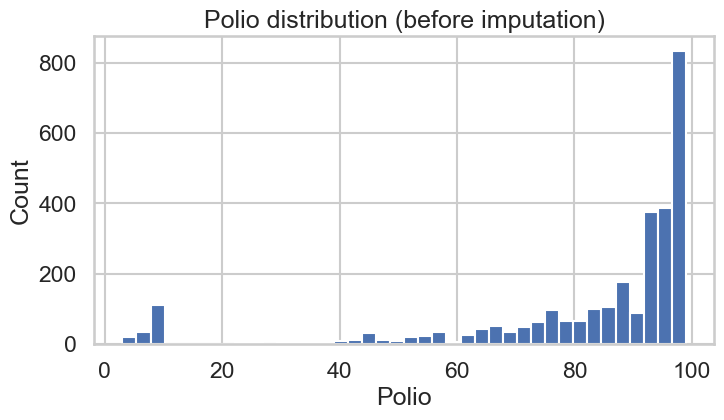

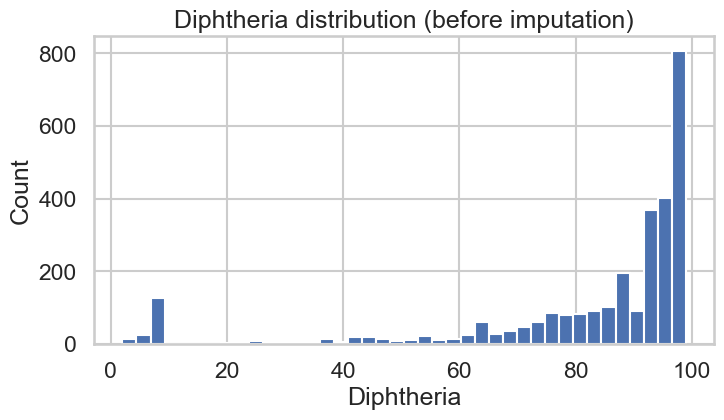

In [106]:
cols = ["Polio", "Diphtheria"]
for c in cols:
    dataframe[c] = pd.to_numeric(dataframe[c], errors="coerce")

print("Missing %:")
print((dataframe[cols].isna().mean()*100).round(3))

for c in cols:
    plt.figure(figsize=(8,4))
    plt.hist(dataframe[c].dropna(), bins=40)
    plt.title(f"{c} distribution (before imputation)")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

In [107]:
for c in ["Polio","Diphtheria"]:
    s = pd.to_numeric(dataframe[c], errors="coerce")
    print("\n==", c, "==")
    print("min:", float(s.min()), "max:", float(s.max()))
    print("<10 count:", int((s < 10).sum()))
    print("<10 %:", round((s < 10).mean()*100, 3))
    print("==0 count:", int((s == 0).sum()))


== Polio ==
min: 3.0 max: 99.0
<10 count: 167
<10 %: 5.719
==0 count: 0

== Diphtheria ==
min: 2.0 max: 99.0
<10 count: 166
<10 %: 5.685
==0 count: 0


In [108]:
low = dataframe.loc[pd.to_numeric(dataframe["Polio"], errors="coerce") < 10,
                    ["Country","Year","Polio","Diphtheria","Status"]].copy()
low["Polio"] = pd.to_numeric(low["Polio"], errors="coerce")
print("Low Polio rows:", len(low))
print(low.sort_values(["Polio","Country","Year"]).head(40).to_string(index=False))

Low Polio rows: 167
                         Country  Year  Polio  Diphtheria     Status
                          Angola  2000    3.0        28.0 Developing
                            Chad  2000    3.0        36.0 Developing
                            Chad  2008    3.0        19.0 Developing
Democratic Republic of the Congo  2001    3.0         3.0 Developing
               Equatorial Guinea  2012    3.0        24.0 Developing
               Equatorial Guinea  2013    3.0         3.0 Developing
                          Angola  2003    4.0         4.0 Developing
                          Angola  2004    4.0         4.0 Developing
        Central African Republic  2001    4.0         4.0 Developing
                            Chad  2011    4.0        33.0 Developing
Democratic Republic of the Congo  2002    4.0        38.0 Developing
                           Niger  2011    4.0        75.0 Developing
                         Nigeria  2002    4.0        25.0 Developing
              

In [109]:
low = dataframe.loc[pd.to_numeric(dataframe["Diphtheria"], errors="coerce") < 10,
                    ["Country","Year","Polio","Diphtheria","Status"]].copy()
low["Diphtheria"] = pd.to_numeric(low["Diphtheria"], errors="coerce")
print("Low Diphtheria rows:", len(low))
print(low.sort_values(["Diphtheria","Country","Year"]).head(40).to_string(index=False))

Low Diphtheria rows: 166
                           Country  Year  Polio  Diphtheria     Status
                 Equatorial Guinea  2014   24.0         2.0 Developing
  Democratic Republic of the Congo  2001    3.0         3.0 Developing
                 Equatorial Guinea  2013    3.0         3.0 Developing
                          Ethiopia  2000   55.0         3.0 Developing
                            Angola  2003    4.0         4.0 Developing
                            Angola  2004    4.0         4.0 Developing
          Central African Republic  2001    4.0         4.0 Developing
                              Chad  2006   49.0         4.0 Developing
                              Chad  2012   51.0         4.0 Developing
  Democratic Republic of the Congo  2000   42.0         4.0 Developing
                 Equatorial Guinea  2006   52.0         4.0 Developing
                          Ethiopia  2004   54.0         4.0 Developing
                           Nigeria  2006   46.0     

In [110]:
low = dataframe.loc[pd.to_numeric(dataframe["Polio"], errors="coerce") < 10,
                    ["Country","Year","Polio","Diphtheria","Status"]].copy()
low["Polio"] = pd.to_numeric(low["Polio"], errors="coerce")

print("Max Polio in low set:", low["Polio"].max())
print(low.sort_values("Polio").head(20).to_string(index=False))

Max Polio in low set: 9.0
                         Country  Year  Polio  Diphtheria     Status
Democratic Republic of the Congo  2001    3.0         3.0 Developing
                          Angola  2000    3.0        28.0 Developing
                            Chad  2000    3.0        36.0 Developing
               Equatorial Guinea  2012    3.0        24.0 Developing
               Equatorial Guinea  2013    3.0         3.0 Developing
                            Chad  2008    3.0        19.0 Developing
Democratic Republic of the Congo  2002    4.0        38.0 Developing
        Central African Republic  2001    4.0         4.0 Developing
                            Chad  2011    4.0        33.0 Developing
                         Nigeria  2002    4.0        25.0 Developing
                           Niger  2011    4.0        75.0 Developing
                          Angola  2004    4.0         4.0 Developing
                          Angola  2003    4.0         4.0 Developing
        

In [111]:
df2 = dataframe.sort_values(["Country", "Year"]).copy()

for c in ["Polio", "Diphtheria"]:
    df2[c] = df2.groupby("Country")[c].transform(lambda s: s.interpolate(limit_direction="both"))
    df2[c] = df2.groupby("Country")[c].transform(lambda s: s.fillna(s.median()))
    df2[c] = df2[c].fillna(df2[c].median())

print("Missing % after Polio/Diphtheria imputation:")
print((df2[["Polio","Diphtheria"]].isna().mean()*100).round(4))

dataframe = df2

Missing % after Polio/Diphtheria imputation:
Polio         0.0
Diphtheria    0.0
dtype: float64


In [112]:
tmp = dataframe[["Life expectancy","Polio","Diphtheria"]].copy()
for c in tmp.columns:
    tmp[c] = pd.to_numeric(tmp[c], errors="coerce")

print(tmp.corr(numeric_only=True)["Life expectancy"].sort_values(ascending=False))

Life expectancy    1.000000
Diphtheria         0.464856
Polio              0.449946
Name: Life expectancy, dtype: float64


Missing %: 1.1643835616438356
count    2886.000000
mean        4.829522
std         4.428383
min         0.100000
25%         1.600000
50%         3.300000
75%         7.175000
max        27.700000
Name: thinness 10-19 years, dtype: float64


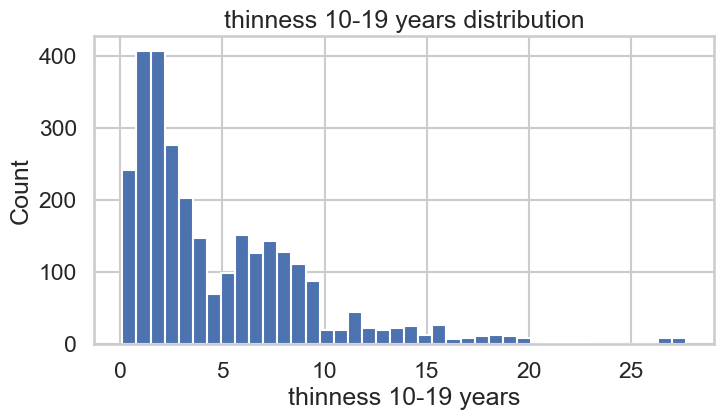

In [113]:
col = "thinness 10-19 years"
dataframe[col] = pd.to_numeric(dataframe[col], errors="coerce")

print("Missing %:", dataframe[col].isna().mean()*100)
print(dataframe[col].describe())

plt.figure(figsize=(8,4))
plt.hist(dataframe[col].dropna(), bins=40)
plt.title("thinness 10-19 years distribution")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

In [114]:
df_sorted = dataframe.sort_values(["Country","Year"]).copy()
df_sorted[col] = pd.to_numeric(df_sorted[col], errors="coerce")

tmp = df_sorted[["Country","Year",col]].dropna().copy()
tmp["absdiff"] = tmp.groupby("Country")[col].diff().abs()

thr = tmp["absdiff"].quantile(0.99)
spikes = tmp[tmp["absdiff"] > thr].sort_values("absdiff", ascending=False)

print("99th% jump threshold:", thr)
print("Top spikes:")
print(spikes.head(25).to_string(index=False))

99th% jump threshold: 8.8
Top spikes:
                         Country  Year  thinness 10-19 years  absdiff
                        Pakistan  2007                   2.8     18.2
                        Pakistan  2012                  19.8     17.8
                     Afghanistan  2002                  19.9     17.8
                      Bangladesh  2005                  19.9     17.8
                    South Africa  2006                   1.6     10.0
                         Namibia  2009                   1.9      9.6
                        Botswana  2003                   1.9      9.5
                         Lesotho  2002                   1.6      9.5
                        Zimbabwe  2001                   1.6      9.4
                           Niger  2010                   1.7      9.3
                         Nigeria  2012                   1.7      9.3
                    Burkina Faso  2003                   1.7      9.3
Democratic Republic of the Congo  2008              

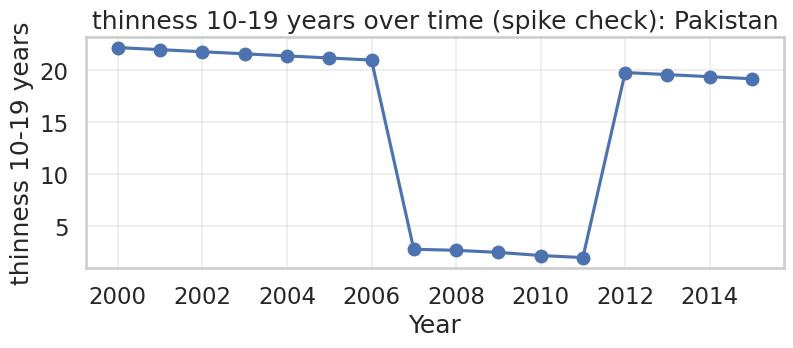

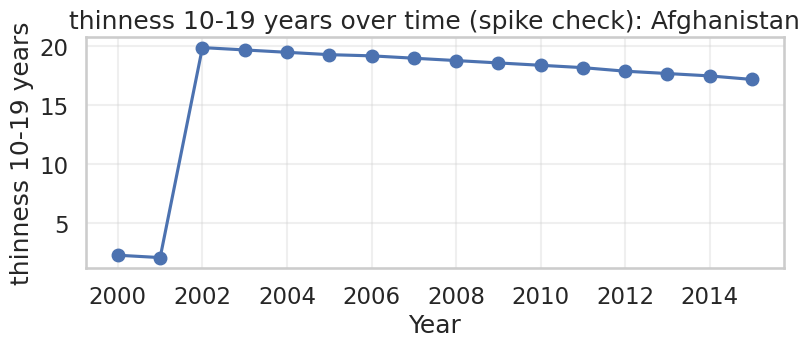

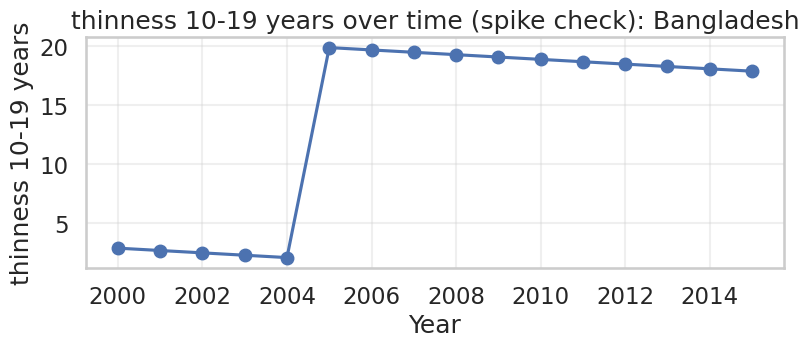

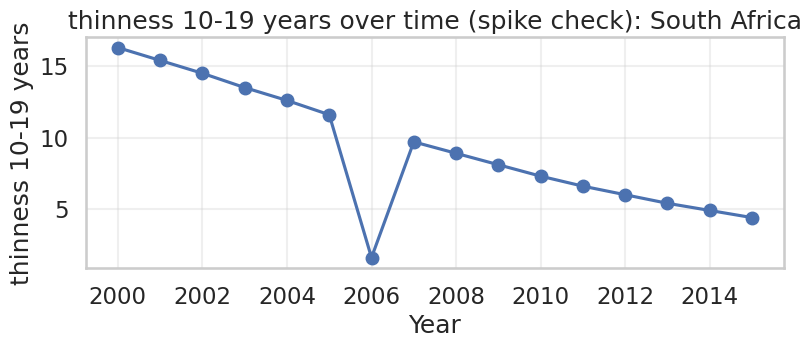

In [409]:
for country in spikes["Country"].head(5).unique():
    s = df_sorted[df_sorted["Country"]==country][["Year",col]].sort_values("Year")
    plt.figure(figsize=(9,3))
    plt.plot(s["Year"], s[col], marker="o")
    plt.title(f"{col} over time (spike check): {country}")
    plt.xlabel("Year"); plt.ylabel(col)
    plt.grid(True, alpha=0.3)
    plt.show()

“Thinness is measured per country-year; values are generally smooth but can have regime shifts likely due to data source/measurement changes.”

“We did not modify observed values; we only imputed missing values using country-wise interpolation, preserving each country’s trajectory.”

In [115]:
df2 = dataframe.sort_values(["Country","Year"]).copy()
df2[col] = pd.to_numeric(df2[col], errors="coerce")

df2.loc[(df2[col] < 0) | (df2[col] > 50), col] = np.nan

df2[col] = df2.groupby("Country")[col].transform(lambda s: s.interpolate(limit_direction="both"))
df2[col] = df2.groupby("Country")[col].transform(lambda s: s.fillna(s.median()))
df2[col] = df2[col].fillna(df2[col].median())

print("Missing % after thinness impute:", df2[col].isna().mean()*100)

dataframe = df2

Missing % after thinness impute: 0.0


c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lukam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [116]:
dataframe = dataframe.drop(columns=["Adult Mortality"], errors="ignore")

In [117]:
y = "Life expectancy"
dataframe[y] = pd.to_numeric(dataframe[y], errors="coerce")

missing_le = dataframe[dataframe[y].isna()]
print("Missing Life expectancy rows:", len(missing_le))

Missing Life expectancy rows: 8


In [118]:
countries = missing_le["Country"].value_counts()

print("Countries with missing Life expectancy:", len(countries))
print(countries.head(30))      # top 30 countries by missing count
print("\nAll affected countries:")
print(countries.index.tolist())

Countries with missing Life expectancy: 8
Country
Dominica                 1
Marshall Islands         1
Monaco                   1
Nauru                    1
Palau                    1
Saint Kitts and Nevis    1
San Marino               1
Tuvalu                   1
Name: count, dtype: int64

All affected countries:
['Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu']


In [119]:
dataframe = dataframe[dataframe["Life expectancy"].notna()].copy()

# Feature Engineering and Feature Selection

In [128]:
dataframe = pd.get_dummies(
    dataframe,
    columns=["Status"],
    drop_first=True
)

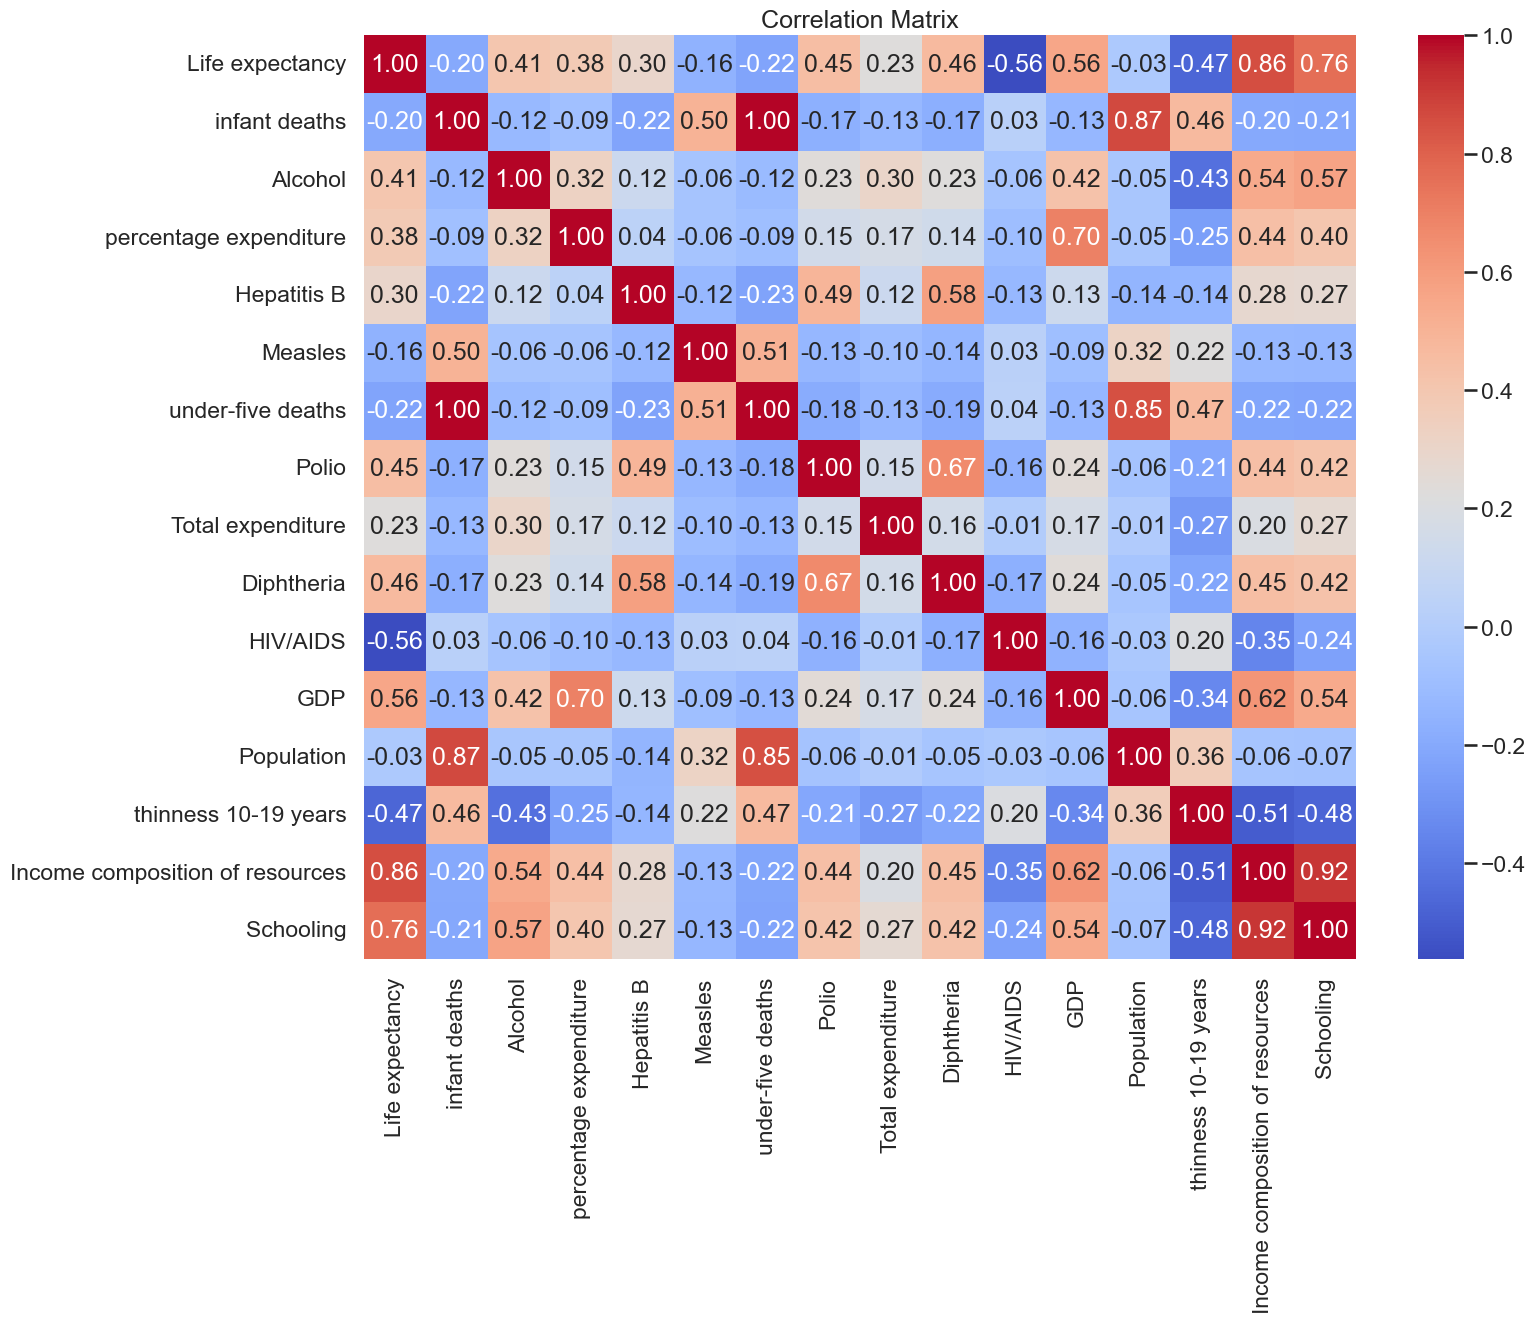

In [123]:
plt.figure(figsize=(16, 12))
numeric_data = dataframe.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [132]:
dataframe.head()

Country  Year  Life expectancy  infant deaths  Alcohol  \
15  Afghanistan  2000             54.8             88     0.02   
14  Afghanistan  2001             55.3             88     0.02   
13  Afghanistan  2002             56.2             88     0.02   
12  Afghanistan  2003             56.7             87     0.02   
11  Afghanistan  2004             57.0             87     0.02   

    percentage expenditure  Hepatitis B  Measles  under-five deaths  Polio  \
15               10.424960         62.0     6532                122   24.0   
14               10.574728         63.0     8762                122   35.0   
13               16.887351         64.0     2486                122   36.0   
12               11.089053         65.0      798                122   41.0   
11               15.296066         67.0      466                120    5.0   

    Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
15               8.20        24.0       0.1  114.560000  29375600.0   
14               7.80        33.0       0.1  117.496980  29664630.0   
13               7.76        36.0       0.1  187.845950  21979923.0   
12               8.82        41.0       0.1  198.728544  23648510.0   
11               8.79         5.0       0.1  219.141353  24118979.0   

    thinness 10-19 years  Income composition of resources  Schooling  \
15                   2.3                            0.338        5.5   
14                   2.1                            0.340        5.9   
13                  19.9                            0.341        6.2   
12                  19.7                            0.373        6.5   
11                  19.5                            0.381        6.8   

     Country_wb  Status_Developing  
15  Afghanistan               True  
14  Afghanistan               True  
13  Afghanistan               True  
12  Afghanistan               True  
11  Afghanistan               True

In [133]:
features =[
    "Schooling",
    "infant deaths",
    "Status_Developing",
    "Alcohol",
    "Polio",
    "HIV/AIDS"
]

target = "Life expectancy"

X = dataframe[features]
y = dataframe[target]

In [134]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.2,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [135]:
model = LinearRegression()
model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [136]:
val_mae = mean_absolute_error(y_val,y_val_pred)
val_r2 = r2_score(y_val,y_val_pred)

test_mae = mean_absolute_error(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)

In [137]:
print("VAL MAE : ",val_mae)
print("VAL R2",val_r2)

print("TEST MAE : ",test_mae)
print("TEST R2",test_r2)

VAL MAE :  3.503604432033334
VAL R2 0.7396141322204158
TEST MAE :  3.5093025254467007
TEST R2 0.7652618449366398


Izborom novih promenljivih za feature selection vidimo poboljsanje od ~0.5 tj. pola godine i poboljsanje R^2 metrike za 0.12!